# Loading packages

In [1]:
pip install cloudpickle


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wrapt


Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import uproot3
import awkward as ak
import sklearn
from sklearn.utils import shuffle
from matplotlib.lines import Line2D
import math
import shap
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.optimizers import SGD

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from itertools import chain
import tensorflow as tf
from keras import optimizers, initializers

from sklearn.utils import shuffle

import itertools
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
2023-08-30 03:24:25.458144: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-30 03:24:25.489648: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 03:24:25.641149: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 03:24:25.642432: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropria

# Loading data files

In [5]:
# data1 = uproot3.open("backg_Karabo.root")
data1 = uproot3.open("/home/prince/Karabo_new_datase/new_bk.root")# background
data2 = uproot3.open("/home/prince/Thuso_Dataset/backgr.root")#BACKGROUND

#data2 = uproot3.open("/home/prince/Karabo_new_datase/new_sg4.root")
data3 = uproot3.open("/home/prince/Karabo_new_datase/new_sg5.root")
data4 = uproot3.open("/home/prince/Karabo_new_datase/new_sg6.root")

# Converting dataframe

In [6]:
data1 = data1['tree'].arrays()
data1 = pd.DataFrame(data1)

data2 = data2['tree'].arrays()
data2 = pd.DataFrame(data2)

data3 = data3['tree'].arrays()
data3 = pd.DataFrame(data3)

data4 = data4['tree'].arrays()
data4 = pd.DataFrame(data4)

In [7]:
data1

,b'nu_me_pt',b'nu_me_eta',b'nu_me_phi',b'nu_me_e',b'nu_me_id',b'b_me_pt',b'b_me_eta',b'b_me_phi',b'b_me_e',b'b_me_id',...,b'ele_truth_n',b'mu_truth_pt',b'mu_truth_eta',b'mu_truth_phi',b'mu_truth_e',b'mu_truth_c',b'mu_truth_id',b'mu_truth_mother',b'mu_truth_mothers_mother',b'mu_truth_n'
0,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
1,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
2,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[6.131211757659912],[-1.788683295249939],[0.02853412553668022],[18.849945068359375],[1.0],[-13.0],[-15.0],[431.0],1
3,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,"[42.04591369628906, 41.870243072509766]","[-0.3245256841182709, 1.0128614902496338]","[0.9797238111495972, 2.7558181285858154]","[44.27960968017578, 65.24746704101562]","[1.0, -1.0]","[-13.0, 13.0]","[23.0, 23.0]","[-11.0, -11.0]",2
4,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
49996,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
49997,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
49998,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,"[58.873390197753906, 23.465660095214844]","[-0.9281559586524963, 1.04779851436615]","[0.6038455367088318, 0.10875517129898071]","[86.1059799194336, 37.56956100463867]","[1.0, -1.0]","[-13.0, 13.0]","[23.0, 23.0]","[-11.0, -11.0]",2


In [8]:
data2

,b'nu_me_pt',b'nu_me_eta',b'nu_me_phi',b'nu_me_e',b'nu_me_id',b'b_me_pt',b'b_me_eta',b'b_me_phi',b'b_me_e',b'b_me_id',...,b'ele_truth_n',b'mu_truth_pt',b'mu_truth_eta',b'mu_truth_phi',b'mu_truth_e',b'mu_truth_c',b'mu_truth_id',b'mu_truth_mother',b'mu_truth_mothers_mother',b'mu_truth_n'
0,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,"[54.48968505859375, 29.573488235473633]","[-1.1560730934143066, 0.22668017446994781]","[0.6870442032814026, -1.4505293369293213]","[95.14315795898438, 30.336732864379883]","[1.0, -1.0]","[-13.0, 13.0]","[23.0, 23.0]","[-11.0, -11.0]",2
1,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
2,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
3,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,"[26.95372200012207, 37.96663284301758]","[-1.5022118091583252, 0.632328987121582]","[-0.12119068950414658, -1.1972615718841553]","[63.533382415771484, 45.81334686279297]","[1.0, -1.0]","[-13.0, 13.0]","[23.0, 23.0]","[-11.0, -11.0]",2
4,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,"[59.29629135131836, 50.984344482421875]","[0.11933630704879761, -0.18321731686592102]","[-0.1095675379037857, -2.1213533878326416]","[59.719112396240234, 51.842586517333984]","[1.0, -1.0]","[-13.0, 13.0]","[23.0, 23.0]","[-11.0, -11.0]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149992,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
149993,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,"[8.472992897033691, 45.080810546875]","[2.9279754161834717, -0.24385832250118256]","[0.45301368832588196, 1.3654601573944092]","[79.40580749511719, 46.42799377441406]","[1.0, -1.0]","[-13.0, 13.0]","[23.0, 23.0]","[-11.0, -11.0]",2
149994,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
149995,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0


In [9]:
data3

,b'nu_me_pt',b'nu_me_eta',b'nu_me_phi',b'nu_me_e',b'nu_me_id',b'b_me_pt',b'b_me_eta',b'b_me_phi',b'b_me_e',b'b_me_id',...,b'ele_truth_n',b'mu_truth_pt',b'mu_truth_eta',b'mu_truth_phi',b'mu_truth_e',b'mu_truth_c',b'mu_truth_id',b'mu_truth_mother',b'mu_truth_mothers_mother',b'mu_truth_n'
0,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[3.5143423080444336],[0.18306627869606018],[2.958007335662842],[3.5749571323394775],[-1.0],[13.0],[15.0],[-531.0],1
1,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,"[14.016738891601562, 97.41837310791016]","[-1.1483666896820068, 0.15287142992019653]","[2.1151747703552246, -1.2356188297271729]","[24.32062530517578, 98.55896759033203]","[1.0, -1.0]","[-13.0, 13.0]","[23.0, 23.0]","[-11.0, -11.0]",2
2,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
3,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
4,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,"[88.97877502441406, 20.34251594543457]","[-0.17192892730236053, 1.0952564477920532]","[0.39968740940093994, -1.6721243858337402]","[90.29716491699219, 33.81352996826172]","[1.0, -1.0]","[-13.0, 13.0]","[23.0, 23.0]","[-11.0, -11.0]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,"[89.32073211669922, 22.85454559326172]","[0.49261319637298584, 0.04830033332109451]","[-1.3392839431762695, 2.205317974090576]","[100.37936401367188, 22.881454467773438]","[1.0, -1.0]","[-13.0, 13.0]","[23.0, 23.0]","[-11.0, -11.0]",2
49996,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
49997,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
49998,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0


In [10]:
data4

,b'nu_me_pt',b'nu_me_eta',b'nu_me_phi',b'nu_me_e',b'nu_me_id',b'b_me_pt',b'b_me_eta',b'b_me_phi',b'b_me_e',b'b_me_id',...,b'ele_truth_n',b'mu_truth_pt',b'mu_truth_eta',b'mu_truth_phi',b'mu_truth_e',b'mu_truth_c',b'mu_truth_id',b'mu_truth_mother',b'mu_truth_mothers_mother',b'mu_truth_n'
0,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
1,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
2,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,1,"[14.91988468170166, 78.77332305908203]","[-1.7527574300765991, 0.016642039641737938]","[-3.08241605758667, -0.9846463203430176]","[44.34043884277344, 78.7843017578125]","[1.0, -1.0]","[-13.0, 13.0]","[23.0, 23.0]","[-11.0, -11.0]",2
3,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
4,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
49996,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
49997,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0
49998,0.0,0.0,0.0,0.0,0.0,[],[],[],[],[],...,0,[],[],[],[],[],[],[],[],0


# Root files have 2 dimensional list. If you scroll to the far right of the above cell, you will see those two lists. 

In [11]:
#Count elements of the 2d list and return a list of number of elements
# say you have A=[[a1,a2,a3], [b1,b2], [c1,c2,c3,c4], [d1,d2,d3]], when you run the function below to this list it 
# will give you the following: [3, 2, 4, 3] which the number of the elements in the 2d list.
def num_var(A):
    newlist = []
    for i in A:
        if type(i) in [list,str,np.ndarray]:
            newlist.append(len(i))
        else:
            newlist.append(len([i]))
    return newlist

If you look at the above two cells, we have b'jet_detector_b', it identifies b-tagged jets, however, its a list of 
zeros and ones, where one indicates that it is b-tagged and zero implies that it is not a b-tagged. so if you want to identify b-tagged jets, you just multiply b'jet_detector_b' with the four vectors of jets (b'jet_pt', b'jet_eta', b'jet_phi', b'jet_e').

In [12]:
# This function performs the above explanation
def Bjet_var(iterA, iterB):
    def multiply(a, b):
        try:
            iter(a)
        except TypeError:
            # You have a number
            return a * b
        return Bjet_var(a, b)
    return [multiply(*pair) for pair in zip(iterA, iterB)]

# We are creating columns for b-tagged jets using the above function:

In [13]:
data1["Bjet_pt"] = Bjet_var(data1[b'jet_detector_b'],data1[b'jet_pt'])
data1["Bjet_eta"] = Bjet_var(data1[b'jet_detector_b'],data1[b'jet_eta'])
data1["Bjet_phi"] = Bjet_var(data1[b'jet_detector_b'],data1[b'jet_phi'])
data1["Bjet_e"] = Bjet_var(data1[b'jet_detector_b'],data1[b'jet_e'])

data2["Bjet_pt"] = Bjet_var(data2[b'jet_detector_b'],data2[b'jet_pt'])
data2["Bjet_eta"] = Bjet_var(data2[b'jet_detector_b'],data2[b'jet_eta'])
data2["Bjet_phi"] = Bjet_var(data2[b'jet_detector_b'],data2[b'jet_phi'])
data2["Bjet_e"] = Bjet_var(data2[b'jet_detector_b'],data2[b'jet_e'])

data3["Bjet_pt"] = Bjet_var(data3[b'jet_detector_b'],data3[b'jet_pt'])
data3["Bjet_eta"] = Bjet_var(data3[b'jet_detector_b'],data3[b'jet_eta'])
data3["Bjet_phi"] = Bjet_var(data3[b'jet_detector_b'],data3[b'jet_phi'])
data3["Bjet_e"] = Bjet_var(data3[b'jet_detector_b'],data3[b'jet_e'])

data4["Bjet_pt"] = Bjet_var(data4[b'jet_detector_b'],data4[b'jet_pt'])
data4["Bjet_eta"] = Bjet_var(data4[b'jet_detector_b'],data4[b'jet_eta'])
data4["Bjet_phi"] = Bjet_var(data4[b'jet_detector_b'],data4[b'jet_phi'])
data4["Bjet_e"] = Bjet_var(data4[b'jet_detector_b'],data4[b'jet_e'])

In [14]:
b1 = data1[b'jet_detector_b'].values
s1 = [sum(f) for f in b1]
data1['nBjets'] = s1

b2 = data2[b'jet_detector_b'].values
s2 = [sum(f) for f in b2]
data2['nBjets'] = s2

b3 = data3[b'jet_detector_b'].values
s3 = [sum(f) for f in b3]
data3['nBjets'] = s3

b4 = data4[b'jet_detector_b'].values
s4 = [sum(f) for f in b4]
data4['nBjets'] = s4

# From the entire dataframe, we are only selecting events which have muons in them

In [15]:
ljets1 = [len(x) for x in data1[b'jet_pt']] # Here we are calculating the number of jets
data1['njets'] = ljets1  # here we are creating a column with the number of jets per event

# Selection of events with muons. Remember, we are yet to select the number of how many muons we want, we are just
# selecting events that have muons in them:

ListOfLists1 = []
for i in range(data1.shape[0]):
    if len(data1[b'muon_pt']) != 0:
        ListOfLists1.append(data1.iloc[i].tolist())

data1 = pd.DataFrame(ListOfLists1, columns = data1.columns)

In [16]:
ljets2 = [len(x) for x in data2[b'jet_pt']]
data2['njets'] = ljets2

ListOfLists2 = []
for i in range(data2.shape[0]):
    if len(data2[b'muon_pt']) != 0:
        ListOfLists2.append(data2.iloc[i].tolist())

data2 = pd.DataFrame(ListOfLists2, columns = data2.columns)

In [17]:
ljets3 = [len(x) for x in data3[b'jet_pt']]
data3['njets'] = ljets3

ListOfLists3 = []
for i in range(data3.shape[0]):
    if len(data3[b'muon_pt']) != 0:
        ListOfLists3.append(data3.iloc[i].tolist())

data3 = pd.DataFrame(ListOfLists3, columns = data3.columns)

In [18]:
ljets4 = [len(x) for x in data4[b'jet_pt']]
data4['njets'] = ljets4

ListOfLists4 = []
for i in range(data4.shape[0]):
    if len(data4[b'muon_pt']) != 0:
        ListOfLists4.append(data4.iloc[i].tolist())

data4 = pd.DataFrame(ListOfLists4, columns = data4.columns)

# We are selecting the columns that we want to see when printing the dataframe

In [19]:
data1 = data1[[ b'jet_detector_b',"Bjet_pt", "Bjet_eta", "Bjet_phi", "Bjet_e", b'jet_pt', b'jet_eta', 
            b'jet_phi',                      b'jet_e',
            b'muon_pt',                   b'muon_eta',
            b'muon_phi',                     b'muon_e',
                                 b'muon_c',
            b'met_et',                      b'met_phi',
            b'nmuon',                        'njets', 'nBjets']]

data2 = data2[[ b'jet_detector_b',"Bjet_pt", "Bjet_eta", "Bjet_phi", "Bjet_e", b'jet_pt', b'jet_eta', 
            b'jet_phi',                      b'jet_e',
            b'muon_pt',                   b'muon_eta',
            b'muon_phi',                     b'muon_e',
                                 b'muon_c',
            b'met_et',                      b'met_phi',
            b'nmuon',                        'njets', 'nBjets']]

data3 = data3[[ b'jet_detector_b',"Bjet_pt", "Bjet_eta", "Bjet_phi", "Bjet_e", b'jet_pt', b'jet_eta', 
            b'jet_phi',                      b'jet_e',
            b'muon_pt',                   b'muon_eta',
            b'muon_phi',                     b'muon_e',
                                 b'muon_c',
            b'met_et',                      b'met_phi',
            b'nmuon',                        'njets', 'nBjets']]

data4 = data4[[ b'jet_detector_b',"Bjet_pt", "Bjet_eta", "Bjet_phi", "Bjet_e", b'jet_pt', b'jet_eta', 
            b'jet_phi',                      b'jet_e',
            b'muon_pt',                   b'muon_eta',
            b'muon_phi',                     b'muon_e',
                                 b'muon_c',
            b'met_et',                      b'met_phi',
            b'nmuon',                        'njets', 'nBjets']]

In [20]:
data4

,b'jet_detector_b',Bjet_pt,Bjet_eta,Bjet_phi,Bjet_e,b'jet_pt',b'jet_eta',b'jet_phi',b'jet_e',b'muon_pt',b'muon_eta',b'muon_phi',b'muon_e',b'muon_c',b'met_et',b'met_phi',b'nmuon',njets,nBjets
0,"[1.0, 1.0]","[53.49755859375, 37.97966766357422]","[-0.6872854828834533, -0.63443785905838]","[2.384852170944214, -0.012866070494055748]","[67.51149821531783, 46.54811685661275]","[53.49755859375, 37.97966766357422]","[-0.6872854828834533, -0.63443785905838]","[2.384852170944214, -0.012866070494055748]","[67.51149821531783, 46.54811685661275]","[43.35278320312501, 38.38298416137695]","[0.10987719148397444, 1.3660211563110354]","[-2.7406375408172607, -0.4438719153404236]","[43.6148720059131, 80.12154832204938]","[-2.0, 2.0]",3.676857,-0.727748,2,2,2.0
1,"[2.0, 1.0]","[63.06999969482422, 26.875247955322266]","[0.1886353939771653, 1.4687520265579224]","[1.5871217250823975, -1.3121650218963623]","[65.70490116355798, 61.71181579120323]","[31.53499984741211, 26.875247955322266]","[0.09431769698858265, 1.4687520265579224]","[0.7935608625411987, -1.3121650218963623]","[32.85245058177899, 61.71181579120323]","[47.5262565612793, 47.42412948608398]","[-0.9487150311470028, -0.4671050310134887]","[1.1036971807479858, -2.780534505844116]","[70.56771805192301, 52.692656759179705]","[-2.0, 2.0]",5.718693,-2.411382,2,2,3.0
2,[1.0],[77.56422424316406],[0.4864046275615692],[1.5266327857971191],[87.29940094692972],[77.56422424316406],[0.4864046275615692],[1.5266327857971191],[87.29940094692972],"[78.68907928466797, 14.932731628417969]","[0.016642039641738018, -1.7527574300765982]","[-0.9846463203430176, -3.08241605758667]","[78.70004634531428, 44.37861916268876]","[-2.0, 2.0]",15.685044,-2.950105,2,1,1.0
3,[1.0],[96.53916931152342],[0.2904505133628846],[-2.2715983390808105],[100.86241193555753],[96.53916931152342],[0.2904505133628846],[-2.2715983390808105],[100.86241193555753],"[44.26336669921875, 39.437435150146484]","[-1.1031812429428098, 0.6408957839012147]","[0.6803568005561829, 1.607428789138794]","[74.04277296392291, 47.81802064189964]","[2.0, -2.0]",10.503728,0.518760,2,1,1.0
4,"[0.0, 1.0]","[0.0, 36.117698669433594]","[-0.0, 0.9348771572113039]","[-0.0, 1.8586009740829468]","[0.0, 53.67882705964663]","[71.39408874511719, 36.117698669433594]","[-0.22966319322586057, 0.9348771572113039]","[-2.8562464714050293, 1.8586009740829468]","[74.1973181543243, 53.67882705964663]","[92.15019226074219, 14.031643867492676]","[0.024854099377989797, -1.4272931814193723]","[-0.20842951536178592, -3.017212390899658]","[92.17871532485626, 30.921438749942805]","[2.0, -2.0]",7.820045,0.044004,2,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,"[1.0, 1.0]","[64.52983093261719, 30.647777557373047]","[-0.3525967299938201, -0.1639000922441482]","[-1.3703899383544922, 2.807565689086914]","[70.05622811942003, 32.23829067209607]","[64.52983093261719, 30.647777557373047]","[-0.3525967299938201, -0.1639000922441482]","[-1.3703899383544922, 2.807565689086914]","[70.05622811942003, 32.23829067209607]","[87.19396972656251, 27.600557327270508]","[0.1965609788894654, 0.6951159834861755]","[1.6768798828125, -0.5543560981750488]","[88.88388467483207, 34.54167818468594]","[2.0, -2.0]",17.527958,-1.448902,2,2,2.0
49996,"[1.0, 1.0]","[82.93570709228516, 29.481334686279297]","[0.08839944750070575, -0.6323667168617247]","[2.044013500213623, -2.3174257278442383]","[83.9493196548518, 35.66321124261071]","[82.93570709228516, 29.481334686279297]","[0.08839944750070575, -0.6323667168617247]","[2.044013500213623, -2.3174257278442383]","[83.9493196548518, 35.66321124261071]","[76.51589965820312, 30.108570098876953]","[-0.23122054338455206, 0.9760960340499877]","[-1.1013914346694946, 0.5632201433181763]","[78.57048121742567, 45.627456928886275]","[2.0, -2.0]",2.249552,-3.133408,2,2,2.0
49997,"[1.0, 0.0]","[58.026573181152344, 0.0]","[-0.13764491677284238, 0.0]","[-0.7672085165977479, 0.0]","[59.28511522550501, 0.0]","[58.026573181152344, 25.148509979248047

# Selecting events that have 2 muons and 2 jets

In [21]:
# nmuon is the number of muons
# njets is the number of jets
data_1 = data1[data1[b'nmuon'] == 2]
dat1 = data_1[data_1['njets'] == 2]
datw1 = dat1[dat1['nBjets'] == 2]

data_2 = data2[data2[b'nmuon'] == 2]
dat2 = data_2[data_2['njets'] == 2]
datw2 = dat2[dat2['nBjets'] == 2]

data_3 = data3[data3[b'nmuon'] == 2]
dat3 = data_3[data_3['njets'] == 2]
datw3 = dat3[dat3['nBjets'] == 2]

data_4 = data4[data4[b'nmuon'] == 2]
dat4 = data_4[data_4['njets'] == 2]
datw4 = dat4[dat4['nBjets'] == 2]

In [22]:
# Histogram plots

In [23]:
'''
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)
fig, ax = plt.subplots(figsize=(9,5))

weig1 = np.ones_like(data1[b'nmuon']) / float(len(data1[b'nmuon']))
weig2 = np.ones_like(data2[b'nmuon']) / float(len(data2[b'nmuon']))
weig3 = np.ones_like(data3[b'nmuon']) / float(len(data3[b'nmuon']))
weig4 = np.ones_like(data4[b'nmuon']) / float(len(data4[b'nmuon']))

ax.hist(data1[b'nmuon'], bins=30, histtype='step', weights=weig1, range=(0,3), label=r'background', alpha=.7, linewidth=2)
ax.hist(data2[b'nmuon'], bins=30, histtype='step', weights=weig2, range=(0,3), label=r'signal run4', alpha=.7, linewidth=2)
ax.hist(data3[b'nmuon'], bins=30, histtype='step', weights=weig3, range=(0,3), label=r'signal run5', alpha=.7, linewidth=2)
ax.hist(data4[b'nmuon'], bins=30, histtype='step', weights=weig4, range=(0,3), label=r'signal run6', alpha=.7, linewidth=2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('Normalised to unity', fontsize=20, labelpad=15)
plt.xlabel('$N_{\mu}$', horizontalalignment='right', x=1.0, fontsize=30, labelpad=15)
plt.title('Before requiring 2 muons, jets & Bjets', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('num_muon.pdf')
'''

"\nfrom matplotlib.lines import Line2D\n\nrng = np.random.default_rng(seed=123)\nfig, ax = plt.subplots(figsize=(9,5))\n\nweig1 = np.ones_like(data1[b'nmuon']) / float(len(data1[b'nmuon']))\nweig2 = np.ones_like(data2[b'nmuon']) / float(len(data2[b'nmuon']))\nweig3 = np.ones_like(data3[b'nmuon']) / float(len(data3[b'nmuon']))\nweig4 = np.ones_like(data4[b'nmuon']) / float(len(data4[b'nmuon']))\n\nax.hist(data1[b'nmuon'], bins=30, histtype='step', weights=weig1, range=(0,3), label=r'background', alpha=.7, linewidth=2)\nax.hist(data2[b'nmuon'], bins=30, histtype='step', weights=weig2, range=(0,3), label=r'signal run4', alpha=.7, linewidth=2)\nax.hist(data3[b'nmuon'], bins=30, histtype='step', weights=weig3, range=(0,3), label=r'signal run5', alpha=.7, linewidth=2)\nax.hist(data4[b'nmuon'], bins=30, histtype='step', weights=weig4, range=(0,3), label=r'signal run6', alpha=.7, linewidth=2)\n\n\nax.spines['top'].set_visible(False)\nax.spines['right'].set_visible(False)\n\nplt.ylabel('Normali

In [24]:
'''
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)
fig, ax = plt.subplots(figsize=(9,5))
# weig = np.ones_like(data['njets']) / float(len(data['njets']))
weig1 = np.ones_like(data1['njets']) / float(len(data1['njets']))
weig2 = np.ones_like(data2['njets']) / float(len(data2['njets']))
weig3 = np.ones_like(data3['njets']) / float(len(data3['njets']))
weig4 = np.ones_like(data4['njets']) / float(len(data4['njets']))

ax.hist(data1['njets'], bins=30, histtype='step', weights=weig1, range=(0,6), label=r'background', alpha=.7, linewidth=2)
ax.hist(data2['njets'], bins=30, histtype='step', weights=weig2, range=(0,6), label=r'signal run4', alpha=.7, linewidth=2)
ax.hist(data3['njets'], bins=30, histtype='step', weights=weig3, range=(0,6), label=r'signal run5', alpha=.7, linewidth=2)
ax.hist(data4['njets'], bins=30, histtype='step', weights=weig4, range=(0,6), label=r'signal run6', alpha=.7, linewidth=2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('Normalised to unity', fontsize=20, labelpad=15)
plt.xlabel('$N_{Jets}$', horizontalalignment='right', x=1.0, fontsize=30, labelpad=15)
plt.title('Before requiring 2 muons, jets & Bjets', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('num_jets.pdf')
'''

"\nfrom matplotlib.lines import Line2D\n\nrng = np.random.default_rng(seed=123)\nfig, ax = plt.subplots(figsize=(9,5))\n# weig = np.ones_like(data['njets']) / float(len(data['njets']))\nweig1 = np.ones_like(data1['njets']) / float(len(data1['njets']))\nweig2 = np.ones_like(data2['njets']) / float(len(data2['njets']))\nweig3 = np.ones_like(data3['njets']) / float(len(data3['njets']))\nweig4 = np.ones_like(data4['njets']) / float(len(data4['njets']))\n\nax.hist(data1['njets'], bins=30, histtype='step', weights=weig1, range=(0,6), label=r'background', alpha=.7, linewidth=2)\nax.hist(data2['njets'], bins=30, histtype='step', weights=weig2, range=(0,6), label=r'signal run4', alpha=.7, linewidth=2)\nax.hist(data3['njets'], bins=30, histtype='step', weights=weig3, range=(0,6), label=r'signal run5', alpha=.7, linewidth=2)\nax.hist(data4['njets'], bins=30, histtype='step', weights=weig4, range=(0,6), label=r'signal run6', alpha=.7, linewidth=2)\n\n\nax.spines['top'].set_visible(False)\nax.spine

In [25]:
'''
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)
fig, ax = plt.subplots(figsize=(9,5))
# weig = np.ones_like(data['nBjets']) / float(len(data['nBjets']))
weig1 = np.ones_like(data1['nBjets']) / float(len(data1['nBjets']))
weig2 = np.ones_like(data2['nBjets']) / float(len(data2['nBjets']))
weig3 = np.ones_like(data3['nBjets']) / float(len(data3['nBjets']))
weig4 = np.ones_like(data4['nBjets']) / float(len(data4['nBjets']))

ax.hist(data1['nBjets'], bins=30, histtype='step', weights=weig1, range=(0,6), label=r'background', alpha=.7, linewidth=2)
ax.hist(data2['nBjets'], bins=30, histtype='step', weights=weig2, range=(0,6), label=r'signal run4', alpha=.7, linewidth=2)
ax.hist(data3['nBjets'], bins=30, histtype='step', weights=weig3, range=(0,6), label=r'signal run5', alpha=.7, linewidth=2)
ax.hist(data4['nBjets'], bins=30, histtype='step', weights=weig4, range=(0,6), label=r'signal run6', alpha=.7, linewidth=2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('Normalised to unity', fontsize=20, labelpad=15)
plt.xlabel('$N_{BJets}$', horizontalalignment='right', x=1.0, fontsize=30, labelpad=15)
plt.title('Before requiring 2 muons, jets & Bjets', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('num_Bjets.pdf')
'''

"\nfrom matplotlib.lines import Line2D\n\nrng = np.random.default_rng(seed=123)\nfig, ax = plt.subplots(figsize=(9,5))\n# weig = np.ones_like(data['nBjets']) / float(len(data['nBjets']))\nweig1 = np.ones_like(data1['nBjets']) / float(len(data1['nBjets']))\nweig2 = np.ones_like(data2['nBjets']) / float(len(data2['nBjets']))\nweig3 = np.ones_like(data3['nBjets']) / float(len(data3['nBjets']))\nweig4 = np.ones_like(data4['nBjets']) / float(len(data4['nBjets']))\n\nax.hist(data1['nBjets'], bins=30, histtype='step', weights=weig1, range=(0,6), label=r'background', alpha=.7, linewidth=2)\nax.hist(data2['nBjets'], bins=30, histtype='step', weights=weig2, range=(0,6), label=r'signal run4', alpha=.7, linewidth=2)\nax.hist(data3['nBjets'], bins=30, histtype='step', weights=weig3, range=(0,6), label=r'signal run5', alpha=.7, linewidth=2)\nax.hist(data4['nBjets'], bins=30, histtype='step', weights=weig4, range=(0,6), label=r'signal run6', alpha=.7, linewidth=2)\n\n\nax.spines['top'].set_visible(Fa

# To ensure that your required cuts were met, you can plot the number of jets and muons to ensure that each event has what is required

In [26]:
'''
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)
fig, ax = plt.subplots(figsize=(9,5))

weig1 = np.ones_like(datw1['njets']) / float(len(datw1['njets']))
weig2 = np.ones_like(datw2['njets']) / float(len(datw2['njets']))
weig3 = np.ones_like(datw3['njets']) / float(len(datw3['njets']))
weig4 = np.ones_like(datw4['njets']) / float(len(datw4['njets']))

ax.hist(datw1['njets'], bins=30, histtype='step', range=(0,6), label=r'background', alpha=.7, linewidth=2)
ax.hist(datw2['njets'], bins=30, histtype='step', range=(0,6), label=r'signal run4', alpha=.7, linewidth=2)
ax.hist(datw3['njets'], bins=30, histtype='step', range=(0,6), label=r'signal run5', alpha=.7, linewidth=2)
ax.hist(datw4['njets'], bins=30, histtype='step', range=(0,6), label=r'signal run6', alpha=.7, linewidth=2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('Normalised to unity', fontsize=28, labelpad=15)
plt.xlabel('$N_{Jets}$', horizontalalignment='right', x=1.0, fontsize=30, labelpad=15)
plt.title("2 muons, 2 jets, 2Bjets", fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
'''

'\nfrom matplotlib.lines import Line2D\n\nrng = np.random.default_rng(seed=123)\nfig, ax = plt.subplots(figsize=(9,5))\n\nweig1 = np.ones_like(datw1[\'njets\']) / float(len(datw1[\'njets\']))\nweig2 = np.ones_like(datw2[\'njets\']) / float(len(datw2[\'njets\']))\nweig3 = np.ones_like(datw3[\'njets\']) / float(len(datw3[\'njets\']))\nweig4 = np.ones_like(datw4[\'njets\']) / float(len(datw4[\'njets\']))\n\nax.hist(datw1[\'njets\'], bins=30, histtype=\'step\', range=(0,6), label=r\'background\', alpha=.7, linewidth=2)\nax.hist(datw2[\'njets\'], bins=30, histtype=\'step\', range=(0,6), label=r\'signal run4\', alpha=.7, linewidth=2)\nax.hist(datw3[\'njets\'], bins=30, histtype=\'step\', range=(0,6), label=r\'signal run5\', alpha=.7, linewidth=2)\nax.hist(datw4[\'njets\'], bins=30, histtype=\'step\', range=(0,6), label=r\'signal run6\', alpha=.7, linewidth=2)\n\n\nax.spines[\'top\'].set_visible(False)\nax.spines[\'right\'].set_visible(False)\n\nplt.ylabel(\'Normalised to unity\', fontsize=28

In [27]:
'''
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)
fig, ax = plt.subplots(figsize=(9,5))
# weig = np.ones_like(datw[b'nmuon']) / float(len(datw[b'nmuon']))
weig1 = np.ones_like(datw1[b'nmuon']) / float(len(datw1[b'nmuon']))
weig2 = np.ones_like(datw2[b'nmuon']) / float(len(datw2[b'nmuon']))
weig3 = np.ones_like(datw3[b'nmuon']) / float(len(datw3[b'nmuon']))
weig4 = np.ones_like(datw4[b'nmuon']) / float(len(datw4[b'nmuon']))

ax.hist(datw1[b'nmuon'], bins=30, histtype='step', range=(0,6), label=r'background', alpha=.7, linewidth=2)
ax.hist(datw2[b'nmuon'], bins=30, histtype='step', range=(0,6), label=r'signal run4', alpha=.7, linewidth=2)
ax.hist(datw3[b'nmuon'], bins=30, histtype='step', range=(0,6), label=r'signal run5', alpha=.7, linewidth=2)
ax.hist(datw4[b'nmuon'], bins=30, histtype='step', range=(0,6), label=r'signal run6', alpha=.7, linewidth=2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('Normalised to unity', fontsize=28, labelpad=15)
plt.xlabel('$N_{\mu}$', horizontalalignment='right', x=1.0, fontsize=30, labelpad=15)
plt.title("2 muons, 2 jets, 2Bjets", fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
# plt.xticks([6,7,8,9,10,11,12,13])
plt.tight_layout()
'''

'\nfrom matplotlib.lines import Line2D\n\nrng = np.random.default_rng(seed=123)\nfig, ax = plt.subplots(figsize=(9,5))\n# weig = np.ones_like(datw[b\'nmuon\']) / float(len(datw[b\'nmuon\']))\nweig1 = np.ones_like(datw1[b\'nmuon\']) / float(len(datw1[b\'nmuon\']))\nweig2 = np.ones_like(datw2[b\'nmuon\']) / float(len(datw2[b\'nmuon\']))\nweig3 = np.ones_like(datw3[b\'nmuon\']) / float(len(datw3[b\'nmuon\']))\nweig4 = np.ones_like(datw4[b\'nmuon\']) / float(len(datw4[b\'nmuon\']))\n\nax.hist(datw1[b\'nmuon\'], bins=30, histtype=\'step\', range=(0,6), label=r\'background\', alpha=.7, linewidth=2)\nax.hist(datw2[b\'nmuon\'], bins=30, histtype=\'step\', range=(0,6), label=r\'signal run4\', alpha=.7, linewidth=2)\nax.hist(datw3[b\'nmuon\'], bins=30, histtype=\'step\', range=(0,6), label=r\'signal run5\', alpha=.7, linewidth=2)\nax.hist(datw4[b\'nmuon\'], bins=30, histtype=\'step\', range=(0,6), label=r\'signal run6\', alpha=.7, linewidth=2)\n\n\nax.spines[\'top\'].set_visible(False)\nax.spine

In [28]:
'''
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)
fig, ax = plt.subplots(figsize=(9,5))
# weig = np.ones_like(datw['nBjets']) / float(len(datw['nBjets']))
weig1 = np.ones_like(datw1['nBjets']) / float(len(datw1['nBjets']))
weig2 = np.ones_like(datw2['nBjets']) / float(len(datw2['nBjets']))
weig3 = np.ones_like(datw3['nBjets']) / float(len(datw3['nBjets']))
weig4 = np.ones_like(datw4['nBjets']) / float(len(datw4['nBjets']))

ax.hist(datw1['nBjets'], bins=30, histtype='step', range=(0,6), label=r'background', alpha=.7, linewidth=2)
ax.hist(datw2['nBjets'], bins=30, histtype='step', range=(0,6), label=r'signal run4', alpha=.7, linewidth=2)
ax.hist(datw3['nBjets'], bins=30, histtype='step', range=(0,6), label=r'signal run5', alpha=.7, linewidth=2)
ax.hist(datw4['nBjets'], bins=30, histtype='step', range=(0,6), label=r'signal run6', alpha=.7, linewidth=2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('Normalised to unity', fontsize=28, labelpad=15)
plt.xlabel('$N_{Bjets}$', horizontalalignment='right', x=1.0, fontsize=30, labelpad=15)
plt.title("After requiring 2 jets and 2 muons", fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
# plt.xticks([6,7,8,9,10,11,12,13])
plt.tight_layout()
'''

'\nfrom matplotlib.lines import Line2D\n\nrng = np.random.default_rng(seed=123)\nfig, ax = plt.subplots(figsize=(9,5))\n# weig = np.ones_like(datw[\'nBjets\']) / float(len(datw[\'nBjets\']))\nweig1 = np.ones_like(datw1[\'nBjets\']) / float(len(datw1[\'nBjets\']))\nweig2 = np.ones_like(datw2[\'nBjets\']) / float(len(datw2[\'nBjets\']))\nweig3 = np.ones_like(datw3[\'nBjets\']) / float(len(datw3[\'nBjets\']))\nweig4 = np.ones_like(datw4[\'nBjets\']) / float(len(datw4[\'nBjets\']))\n\nax.hist(datw1[\'nBjets\'], bins=30, histtype=\'step\', range=(0,6), label=r\'background\', alpha=.7, linewidth=2)\nax.hist(datw2[\'nBjets\'], bins=30, histtype=\'step\', range=(0,6), label=r\'signal run4\', alpha=.7, linewidth=2)\nax.hist(datw3[\'nBjets\'], bins=30, histtype=\'step\', range=(0,6), label=r\'signal run5\', alpha=.7, linewidth=2)\nax.hist(datw4[\'nBjets\'], bins=30, histtype=\'step\', range=(0,6), label=r\'signal run6\', alpha=.7, linewidth=2)\n\n\nax.spines[\'top\'].set_visible(False)\nax.spine

import math

def calculate_polar_angle(pt, eta, phi):
    
    px = pt * math.cos(phi)
    py = pt * math.sin(phi)
    pz = pt * math.sinh(eta)
    
    
    # Calculate the magnitude of momentum vector
    p = math.sqrt(px**2 + py**2 + pz**2)
    
    # Calculate the polar angle using the arccosine function
    polar_angle = math.acos(pz / p)
    
    # Convert the polar angle from radians to degrees
    polar_angle_deg = math.degrees(polar_angle)
    
    return polar_angle_deg



# Example usage
# Assuming px, py, and pz are the momentum components of the particle
px = 100.0
py = 50.0
pz = 75.0

polar_angle = calculate_polar_angle(px, py, pz)
print("Polar angle: {:.2f} degrees".format(polar_angle))


# Polar & Azimuthal angles

In [29]:
def get_polar_azimuthal_angles(pt, eta, phi, e):
    angles = []
    for i in range(len(pt)):
        # Calculate transverse energy (Et)
        Et = e[i] * math.sinh(eta[i])

        # Calculate polar angle (θ)
#         theta = 2 * math.atan(math.exp(-eta[i]))
        theta = 2 * np.arctan(np.exp(-eta[i]))
#         theta = 2 * np.arctan(np.exp(-np.abs(eta[i])))

        # Azimuthal angle (φ) remains the same
        azimuthal_angle = phi[i]

        angles.append([theta, azimuthal_angle])

    return angles

# invariant mass

In [30]:
def invariant_mass(pt1, eta1, phi1, e1, pt2, eta2, phi2, e2):
    # Calculate transverse momentum (pT) components
    px1 = pt1 * math.cos(phi1)
    py1 = pt1 * math.sin(phi1)
    pz1 = pt1 * math.sinh(eta1)
    px2 = pt2 * math.cos(phi2)
    py2 = pt2 * math.sin(phi2)
    pz2 = pt2 * math.sinh(eta2)

    # Calculate energy components
    energy1 = e1
    energy2 = e2

    # Calculate total energy and momentum components
    total_energy = energy1 + energy2
    total_px = px1 + px2
    total_py = py1 + py2
    total_pz = pz1 + pz2

    # Calculate invariant mass squared
    mass_squared = total_energy ** 2 - total_px ** 2 - total_py ** 2 - total_pz ** 2
#     mass_squared = 250  - 2*(e1 + e2)*(math.sqrt(250))

    # Take the square root to obtain the invariant mass
    if mass_squared >= 0:
        invariant_mass = math.sqrt(mass_squared)
    else:
        invariant_mass = None

    return invariant_mass


# recoil mass

In [31]:
def recoil_mass(pt1, eta1, phi1, e1, pt2, eta2, phi2, e2):
    # Calculate the energy components
    px1 = pt1 * math.cos(phi1)
    py1 = pt1 * math.sin(phi1)
    pz1 = pt1 * math.sinh(eta1)
    px2 = pt2 * math.cos(phi2)
    py2 = pt2 * math.sin(phi2)
    pz2 = pt2 * math.sinh(eta2)

    # Calculate the total momentum components
    px_total = px1 + px2
    py_total = py1 + py2
    pz_total = pz1 + pz2

    # Calculate the total energy
    e_total = e1 + e2

    # Calculate the recoil mass
    m_recoil_squared = e_total**2 - px_total**2 - py_total**2 - pz_total**2

    if m_recoil_squared >= 0:
        m_recoil = math.sqrt(m_recoil_squared)
        return m_recoil
    else:
        return None

In [32]:
def pt_che(List):
    greaterThan = []
    lessThan = []
    for j in range(len(List)):
        if(List[j] > 0):
            greaterThan.append(List[j])
        else:
            lessThan.append(List[j])
    if len(greaterThan) == len(List):
        
        return List
    else:
        pass

In [33]:
datw1 = datw1.reset_index(drop=True)

datw2 = datw2.reset_index(drop=True)

datw3 = datw3.reset_index(drop=True)

datw4 = datw4.reset_index(drop=True)

In [34]:
def che_Bjet_not0(df):
    chec = []
    for i in range(df.shape[0]):
        if len(df['Bjet_pt'][i]) != 0:
            if pt_che(df['Bjet_pt'][i]) is not None:
                chec.append(df.iloc[i].tolist())
    return chec

# Assuming you have three DataFrames: df1, df2, and df3
chec1 = che_Bjet_not0(datw1)
chec2 = che_Bjet_not0(datw2)
chec3 = che_Bjet_not0(datw3)
chec4 = che_Bjet_not0(datw4)

In [35]:
datw1 = pd.DataFrame(chec1, columns = datw1.columns)

datw2 = pd.DataFrame(chec2, columns = datw2.columns)

datw3 = pd.DataFrame(chec3, columns = datw3.columns)

datw4 = pd.DataFrame(chec4, columns = datw4.columns)

In [36]:
List_mu1 = []
for i in range(datw1.shape[0]):
    pt = datw1.iloc[i][b'muon_pt']
    eta = datw1.iloc[i][b'muon_eta']
    phi = datw1.iloc[i][b'muon_phi']
    e = datw1.iloc[i][b'muon_e']
    angles = get_polar_azimuthal_angles(pt, eta, phi, e)
    List_mu1.append(angles)

datw1['polar_mu'] = [[row[0] for row in angles] for angles in List_mu1]
datw1['azimuthal_mu'] = [[row[1] for row in angles] for angles in List_mu1]

List_bjet1 = []
for i in range(datw1.shape[0]):
    pt = datw1.iloc[i]['Bjet_pt']
    eta = datw1.iloc[i]['Bjet_eta']
    phi = datw1.iloc[i]['Bjet_phi']
    e = datw1.iloc[i]['Bjet_e']
    angles = get_polar_azimuthal_angles(pt, eta, phi, e)
    List_bjet1.append(angles)

datw1['polar_bjet'] = [[row[0] for row in angles] for angles in List_bjet1]
datw1['azimuthal_bjet'] = [[row[1] for row in angles] for angles in List_bjet1]

List_mu2 = []
for i in range(datw2.shape[0]):
    pt = datw2.iloc[i][b'muon_pt']
    eta = datw2.iloc[i][b'muon_eta']
    phi = datw2.iloc[i][b'muon_phi']
    e = datw2.iloc[i][b'muon_e']
    angles = get_polar_azimuthal_angles(pt, eta, phi, e)
    List_mu2.append(angles)

datw2['polar_mu'] = [[row[0] for row in angles] for angles in List_mu2]
datw2['azimuthal_mu'] = [[row[1] for row in angles] for angles in List_mu2]

List_bjet2 = []
for i in range(datw2.shape[0]):
    pt = datw2.iloc[i]['Bjet_pt']
    eta = datw2.iloc[i]['Bjet_eta']
    phi = datw2.iloc[i]['Bjet_phi']
    e = datw2.iloc[i]['Bjet_e']
    angles = get_polar_azimuthal_angles(pt, eta, phi, e)
    List_bjet2.append(angles)

datw2['polar_bjet'] = [[row[0] for row in angles] for angles in List_bjet2]
datw2['azimuthal_bjet'] = [[row[1] for row in angles] for angles in List_bjet2]

List_mu3 = []
for i in range(datw3.shape[0]):
    pt = datw3.iloc[i][b'muon_pt']
    eta = datw3.iloc[i][b'muon_eta']
    phi = datw3.iloc[i][b'muon_phi']
    e = datw3.iloc[i][b'muon_e']
    angles = get_polar_azimuthal_angles(pt, eta, phi, e)
    List_mu3.append(angles)

datw3['polar_mu'] = [[row[0] for row in angles] for angles in List_mu3]
datw3['azimuthal_mu'] = [[row[1] for row in angles] for angles in List_mu3]

List_bjet3 = []
for i in range(datw3.shape[0]):
    pt = datw3.iloc[i]['Bjet_pt']
    eta = datw3.iloc[i]['Bjet_eta']
    phi = datw3.iloc[i]['Bjet_phi']
    e = datw3.iloc[i]['Bjet_e']
    angles = get_polar_azimuthal_angles(pt, eta, phi, e)
    List_bjet3.append(angles)

datw3['polar_bjet'] = [[row[0] for row in angles] for angles in List_bjet3]
datw3['azimuthal_bjet'] = [[row[1] for row in angles] for angles in List_bjet3]

List_mu4 = []
for i in range(datw4.shape[0]):
    pt = datw4.iloc[i][b'muon_pt']
    eta = datw4.iloc[i][b'muon_eta']
    phi = datw4.iloc[i][b'muon_phi']
    e = datw4.iloc[i][b'muon_e']
    angles = get_polar_azimuthal_angles(pt, eta, phi, e)
    List_mu4.append(angles)

datw4['polar_mu'] = [[row[0] for row in angles] for angles in List_mu4]
datw4['azimuthal_mu'] = [[row[1] for row in angles] for angles in List_mu4]

List_bjet4 = []
for i in range(datw4.shape[0]):
    pt = datw4.iloc[i]['Bjet_pt']
    eta = datw4.iloc[i]['Bjet_eta']
    phi = datw4.iloc[i]['Bjet_phi']
    e = datw4.iloc[i]['Bjet_e']
    angles = get_polar_azimuthal_angles(pt, eta, phi, e)
    List_bjet4.append(angles)

datw4['polar_bjet'] = [[row[0] for row in angles] for angles in List_bjet4]
datw4['azimuthal_bjet'] = [[row[1] for row in angles] for angles in List_bjet4]

In [37]:
recoil_mass_1 = []
for i in range(datw1.shape[0]):
    pt1 = datw1.iloc[i][b'muon_pt'][0]
    eta1 = datw1.iloc[i][b'muon_eta'][0]
    phi1 = datw1.iloc[i][b'muon_phi'][0]
    e1 = datw1.iloc[i][b'muon_e'][0]

    pt2 = datw1.iloc[i][b'muon_pt'][1]
    eta2 = datw1.iloc[i][b'muon_eta'][1]
    phi2 = datw1.iloc[i][b'muon_phi'][1]
    e2 = datw1.iloc[i][b'muon_e'][1]

    mass = recoil_mass(pt1, eta1, phi1, e1, pt2, eta2, phi2, e2)
    recoil_mass_1.append(mass)

# Add the visible mass column to the datw1Frame
datw1['recoil_mass'] = recoil_mass_1

recoil_mass_2 = []
for i in range(datw2.shape[0]):
    pt1 = datw2.iloc[i][b'muon_pt'][0]
    eta1 = datw2.iloc[i][b'muon_eta'][0]
    phi1 = datw2.iloc[i][b'muon_phi'][0]
    e1 = datw2.iloc[i][b'muon_e'][0]

    pt2 = datw2.iloc[i][b'muon_pt'][1]
    eta2 = datw2.iloc[i][b'muon_eta'][1]
    phi2 = datw2.iloc[i][b'muon_phi'][1]
    e2 = datw2.iloc[i][b'muon_e'][1]

    mass = recoil_mass(pt1, eta1, phi1, e1, pt2, eta2, phi2, e2)
    recoil_mass_2.append(mass)

# Add the visible mass column to the datw2Frame
datw2['recoil_mass'] = recoil_mass_2

recoil_mass_3 = []
for i in range(datw3.shape[0]):
    pt1 = datw3.iloc[i][b'muon_pt'][0]
    eta1 = datw3.iloc[i][b'muon_eta'][0]
    phi1 = datw3.iloc[i][b'muon_phi'][0]
    e1 = datw3.iloc[i][b'muon_e'][0]

    pt2 = datw3.iloc[i][b'muon_pt'][1]
    eta2 = datw3.iloc[i][b'muon_eta'][1]
    phi2 = datw3.iloc[i][b'muon_phi'][1]
    e2 = datw3.iloc[i][b'muon_e'][1]

    mass = recoil_mass(pt1, eta1, phi1, e1, pt2, eta2, phi2, e2)
    recoil_mass_3.append(mass)

# Add the visible mass column to the datw3Frame
datw3['recoil_mass'] = recoil_mass_3

recoil_mass_4 = []
for i in range(datw4.shape[0]):
    pt1 = datw4.iloc[i][b'muon_pt'][0]
    eta1 = datw4.iloc[i][b'muon_eta'][0]
    phi1 = datw4.iloc[i][b'muon_phi'][0]
    e1 = datw4.iloc[i][b'muon_e'][0]

    pt2 = datw4.iloc[i][b'muon_pt'][1]
    eta2 = datw4.iloc[i][b'muon_eta'][1]
    phi2 = datw4.iloc[i][b'muon_phi'][1]
    e2 = datw4.iloc[i][b'muon_e'][1]

    mass = recoil_mass(pt1, eta1, phi1, e1, pt2, eta2, phi2, e2)
    recoil_mass_4.append(mass)

# Add the visible mass column to the datw4Frame
datw4['recoil_mass'] = recoil_mass_4

In [38]:
def calculate_invariant_mass(E, p):
    masses = []
    for i in range(len(E)):
        E1 = E[i][0]
        E2 = E[i][1]
        p1 = np.linalg.norm(p[i][0])
        p2 = np.linalg.norm(p[i][1])
        invariant_mass = np.sqrt((E1 + E2)**2 - np.abs((p1 + p2)**2))
        masses.append(invariant_mass)
    return masses

In [39]:
datw1['muons_in_m'] = calculate_invariant_mass(datw1[b'muon_e'], datw1[b'muon_pt'])

datw2['muons_in_m'] = calculate_invariant_mass(datw2[b'muon_e'], datw2[b'muon_pt'])

datw3['muons_in_m'] = calculate_invariant_mass(datw3[b'muon_e'], datw3[b'muon_pt'])

datw4['muons_in_m'] = calculate_invariant_mass(datw4[b'muon_e'], datw4[b'muon_pt'])

In [40]:
datw1['Bjet_in_m'] = calculate_invariant_mass(datw1['Bjet_e'], datw1['Bjet_pt'])

datw2['Bjet_in_m'] = calculate_invariant_mass(datw2['Bjet_e'], datw2['Bjet_pt'])

datw3['Bjet_in_m'] = calculate_invariant_mass(datw3['Bjet_e'], datw3['Bjet_pt'])

datw4['Bjet_in_m'] = calculate_invariant_mass(datw4['Bjet_e'], datw4['Bjet_pt'])

In [41]:
def calculate_recoil_mass(invariant_mass, E):
    s = 250**2
    recoil_masses = []
    for row in E:
        E1 = row[0]
        E2 = row[1]
        expression = s + invariant_mass.iloc[0]**2 - 2 * (E1 + E2) * math.sqrt(s)
        expression = max(expression, 0)  # Ensure expression is non-negative
        recoil_mass = math.sqrt(expression)
        recoil_masses.append(recoil_mass)
    return recoil_masses

In [42]:
datw1['R_mass'] = calculate_recoil_mass(datw1['recoil_mass'], datw1[b'muon_e'].tolist())

datw2['R_mass'] = calculate_recoil_mass(datw2['recoil_mass'], datw2[b'muon_e'].tolist())

datw3['R_mass'] = calculate_recoil_mass(datw3['recoil_mass'], datw3[b'muon_e'].tolist())

datw4['R_mass'] = calculate_recoil_mass(datw4['recoil_mass'], datw4[b'muon_e'].tolist())

from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

weig1 = np.ones_like(eta_muon21) / float(len(eta_muon11))
weig2 = np.ones_like(eta_muon31) / float(len(eta_muon21))
weig3 = np.ones_like(eta_muon41) / float(len(eta_muon31))
weigh2 = np.ones_like(eta_muon11) / float(len(eta_muon41))

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(eta_muon11, bins=35, range=(-math.pi,math.pi), histtype='step', weights=weigh2, label=r'Background', alpha=.7, linewidth=2)
ax.hist(eta_muon21, bins=35, range=(-math.pi,math.pi), histtype='step', weights=weig1, label=r'signal run4', alpha=.7, linewidth=2)
ax.hist(eta_muon31, bins=35, range=(-math.pi,math.pi), histtype='step', weights=weig2, label=r'signal run5', alpha=.7, linewidth=2)
ax.hist(eta_muon41, bins=35, range=(-math.pi,math.pi), histtype='step', weights=weig3, label=r'signal run6', alpha=.7, linewidth=2)



plt.ylabel('Normalised to unity', fontsize=30, labelpad=15)
plt.xlabel('$\mu$1 eta', fontsize=30, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
plt.legend(loc='upper right', frameon=False)

In [43]:
mass_list_1 = []
for i in range(datw1.shape[0]):
    pt1 = datw1.iloc[i]['Bjet_pt'][0]
    eta1 = datw1.iloc[i]['Bjet_eta'][0]
    phi1 = datw1.iloc[i]['Bjet_phi'][0]
    e1 = datw1.iloc[i]['Bjet_e'][0]

    pt2 = datw1.iloc[i]['Bjet_pt'][1]
    eta2 = datw1.iloc[i]['Bjet_eta'][1]
    phi2 = datw1.iloc[i]['Bjet_phi'][1]
    e2 = datw1.iloc[i]['Bjet_e'][1]
    
#     mk1 = datw1['recoil_mass'].values()
    
    mass = invariant_mass(pt1, eta1, phi1, e1, pt2, eta2, phi2, e2)
    mass_list_1.append(mass)

# Add the invariant mass column to the datw1Frame
datw1['invariant_mass'] = mass_list_1

mass_list_2 = []
for i in range(datw2.shape[0]):
    pt1 = datw2.iloc[i]['Bjet_pt'][0]
    eta1 = datw2.iloc[i]['Bjet_eta'][0]
    phi1 = datw2.iloc[i]['Bjet_phi'][0]
    e1 = datw2.iloc[i]['Bjet_e'][0]

    pt2 = datw2.iloc[i]['Bjet_pt'][1]
    eta2 = datw2.iloc[i]['Bjet_eta'][1]
    phi2 = datw2.iloc[i]['Bjet_phi'][1]
    e2 = datw2.iloc[i]['Bjet_e'][1]
    
#     mk2 = datw2['recoil_mass'].values()
    
    mass = invariant_mass(pt1, eta1, phi1, e1, pt2, eta2, phi2, e2)
    mass_list_2.append(mass)

# Add the invariant mass column to the datw2Frame
datw2['invariant_mass'] = mass_list_2

mass_list_3 = []
for i in range(datw3.shape[0]):
    pt1 = datw3.iloc[i]['Bjet_pt'][0]
    eta1 = datw3.iloc[i]['Bjet_eta'][0]
    phi1 = datw3.iloc[i]['Bjet_phi'][0]
    e1 = datw3.iloc[i]['Bjet_e'][0]

    pt2 = datw3.iloc[i]['Bjet_pt'][1]
    eta2 = datw3.iloc[i]['Bjet_eta'][1]
    phi2 = datw3.iloc[i]['Bjet_phi'][1]
    e2 = datw3.iloc[i]['Bjet_e'][1]
    
#     mk3 = datw3['recoil_mass'].values()
    
    mass = invariant_mass(pt1, eta1, phi1, e1, pt2, eta2, phi2, e2)
    mass_list_3.append(mass)

# Add the invariant mass column to the datw3Frame
datw3['invariant_mass'] = mass_list_3

mass_list_4 = []
for i in range(datw4.shape[0]):
    pt1 = datw4.iloc[i]['Bjet_pt'][0]
    eta1 = datw4.iloc[i]['Bjet_eta'][0]
    phi1 = datw4.iloc[i]['Bjet_phi'][0]
    e1 = datw4.iloc[i]['Bjet_e'][0]

    pt2 = datw4.iloc[i]['Bjet_pt'][1]
    eta2 = datw4.iloc[i]['Bjet_eta'][1]
    phi2 = datw4.iloc[i]['Bjet_phi'][1]
    e2 = datw4.iloc[i]['Bjet_e'][1]
    
#     mk4 = datw4['recoil_mass'].values()

    mass = invariant_mass(pt1, eta1, phi1, e1, pt2, eta2, phi2, e2)
    mass_list_4.append(mass)

# Add the invariant mass column to the datw4Frame
datw4['invariant_mass'] = mass_list_4

In [44]:
polar_muon11 = [x[0] for x in datw1['polar_mu']]
polar_muon21 = [x[0] for x in datw2['polar_mu']]
polar_muon31 = [x[0] for x in datw3['polar_mu']]
polar_muon41 = [x[0] for x in datw4['polar_mu']]

polar_muon12 = [x[1] for x in datw1['polar_mu']]
polar_muon22 = [x[1] for x in datw2['polar_mu']]
polar_muon32 = [x[1] for x in datw3['polar_mu']]
polar_muon42 = [x[1] for x in datw4['polar_mu']]

azimuthal_muon11 = [x[0] for x in datw1['azimuthal_mu']]
azimuthal_muon21 = [x[0] for x in datw2['azimuthal_mu']]
azimuthal_muon31 = [x[0] for x in datw3['azimuthal_mu']]
azimuthal_muon41 = [x[0] for x in datw4['azimuthal_mu']]

azimuthal_muon12 = [x[1] for x in datw1['azimuthal_mu']]
azimuthal_muon22 = [x[1] for x in datw2['azimuthal_mu']]
azimuthal_muon32 = [x[1] for x in datw3['azimuthal_mu']]
azimuthal_muon42 = [x[1] for x in datw4['azimuthal_mu']]

polar_bjet11 = [x[0] for x in datw1['polar_bjet']]
polar_bjet21 = [x[0] for x in datw2['polar_bjet']]
polar_bjet31 = [x[0] for x in datw3['polar_bjet']]
polar_bjet41 = [x[0] for x in datw4['polar_bjet']]

polar_bjet12 = [x[1] for x in datw1['polar_bjet']]
polar_bjet22 = [x[1] for x in datw2['polar_bjet']]
polar_bjet32 = [x[1] for x in datw3['polar_bjet']]
polar_bjet42 = [x[1] for x in datw4['polar_bjet']]

azimuthal_bjet11 = [x[0] for x in datw1['azimuthal_bjet']]
azimuthal_bjet21 = [x[0] for x in datw2['azimuthal_bjet']]
azimuthal_bjet31 = [x[0] for x in datw3['azimuthal_bjet']]
azimuthal_bjet41 = [x[0] for x in datw4['azimuthal_bjet']]

azimuthal_bjet12 = [x[1] for x in datw1['azimuthal_bjet']]
azimuthal_bjet22 = [x[1] for x in datw2['azimuthal_bjet']]
azimuthal_bjet32 = [x[1] for x in datw3['azimuthal_bjet']]
azimuthal_bjet42 = [x[1] for x in datw4['azimuthal_bjet']]

e_muon11 = [x[0] for x in datw1[b'muon_e']]
e_muon21 = [x[0] for x in datw2[b'muon_e']]
e_muon31 = [x[0] for x in datw3[b'muon_e']]
e_muon41 = [x[0] for x in datw4[b'muon_e']]

e_muon12 = [x[1] for x in datw1[b'muon_e']]
e_muon22 = [x[1] for x in datw2[b'muon_e']]
e_muon32 = [x[1] for x in datw3[b'muon_e']]
e_muon42 = [x[1] for x in datw4[b'muon_e']]

e_Bjet11 = [x[0] for x in datw1['Bjet_e']]
e_Bjet21 = [x[0] for x in datw2['Bjet_e']]
e_Bjet31 = [x[0] for x in datw3['Bjet_e']]
e_Bjet41 = [x[0] for x in datw4['Bjet_e']]

e_Bjet12 = [x[1] for x in datw1['Bjet_e']]
e_Bjet22 = [x[1] for x in datw2['Bjet_e']]
e_Bjet32 = [x[1] for x in datw3['Bjet_e']]
e_Bjet42 = [x[1] for x in datw4['Bjet_e']]

In [45]:
datw4

,b'jet_detector_b',Bjet_pt,Bjet_eta,Bjet_phi,Bjet_e,b'jet_pt',b'jet_eta',b'jet_phi',b'jet_e',b'muon_pt',...,nBjets,polar_mu,azimuthal_mu,polar_bjet,azimuthal_bjet,recoil_mass,muons_in_m,Bjet_in_m,R_mass,invariant_mass
0,"[1.0, 1.0]","[53.49755859375, 37.97966766357422]","[-0.6872854828834533, -0.63443785905838]","[2.384852170944214, -0.012866070494055748]","[67.51149821531783, 46.54811685661275]","[53.49755859375, 37.97966766357422]","[-0.6872854828834533, -0.63443785905838]","[2.384852170944214, -0.012866070494055748]","[67.51149821531783, 46.54811685661275]","[43.35278320312501, 38.38298416137695]",...,2.0,"[1.46113956150498, 0.4995833503153668]","[-2.7406375408172607, -0.4438719153404236]","[2.209599838753338, 2.166510988460822]","[2.384852170944214, -0.012866070494055748]",92.341604,92.897611,68.128649,95.701419,86.070640
1,"[1.0, 1.0]","[54.96716308593749, 35.238948822021484]","[0.7148224115371704, -0.8398255109786987]","[-2.81130051612854, -1.8755874633789062]","[70.14767861169035, 48.78974029123007]","[54.96716308593749, 35.238948822021484]","[0.7148224115371704, -0.8398255109786987]","[-2.81130051612854, -1.8755874633789062]","[70.14767861169035, 48.78974029123007]","[78.66371154785156, 30.659095764160156]",...,2.0,"[1.268269081066423, 2.2942109298527003]","[0.30741822719573975, 1.9333736896514893]","[0.9100681566781383, 2.3263841295701804]","[-2.81130051612854, -1.8755874633789062]",91.306361,57.041925,77.517527,96.809978,86.567754
2,"[1.0, 1.0]","[47.85482025146484, 36.489540100097656]","[-1.051266670227051, -0.6540589928627014]","[-3.0450167655944824, 0.3680962920188904]","[77.11947380377062, 45.34252730797807]","[47.85482025146484, 36.489540100097656]","[-1.051266670227051, -0.6540589928627014]","[-3.0450167655944824, 0.3680962920188904]","[77.11947380377062, 45.34252730797807]","[37.283447265625, 20.079471588134766]",...,2.0,"[1.1848679295590931, 0.26063101172943215]","[-1.1189985275268555, 1.992050290107727]","[2.4691433365507818, 2.182662556088489]","[-3.0450167655944824, 0.3680962920188904]",74.075589,103.307068,88.786095,109.291856,85.991079
3,"[1.0, 1.0]","[58.91766357421875, 35.91217803955078]","[0.17193853855133062, -0.4298722743988038]","[1.3601709604263306, -0.35879138112068176]","[60.4757074540385, 39.911276272967235]","[58.91766357421875, 35.91217803955078]","[0.17193853855133062, -0.4298722743988038]","[1.3601709604263306, -0.35879138112068176]","[60.4757074540385, 39.911276272967235]","[66.76837921142578, 46.34908676147461]",...,2.0,"[1.6392160204853417, 1.513537775021135]","[-1.8380849361419678, 2.6968016624450684]","[1.399698746205851, 1.988009837769366]","[1.3601709604263306, -0.35879138112068176]",85.622542,7.262048,32.937025,119.799016,76.865858
4,"[1.0, 1.0]","[65.5042953491211, 33.72139358520508]","[-0.4409311413764955, 0.0070662377402186454]","[1.5103758573532104, -0.25686740875244135]","[72.34496361731944, 34.574749984292424]","[65.5042953491211, 33.72139358520508]","[-0.4409311413764955, 0.0070662377402186454]","[1.5103758573532104, -0.25686740875244135]","[72.34496361731944, 34.574749984292424]","[50.87132263183594, 24.451154708862305]",...,2.0,"[0.6617429413165161, 2.4741399225448206]","[-2.2532615661621094, -1.758919596672058]","[1.9980973024042907, 1.5637301478588397]","[1.5103758573532104, -0.25686740875244135]",91.668455,96.337242,39.825718,99.413292,77.399120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,"[1.0, 1.0]","[86.4509811401367, 22.795492172241207]","[-0.3442847430706024, 0.5031663775444033]","[-0.5391419529914856, -2.5539958477020264]","[92.3222712086012, 26.111407981277495]","[86.4509811401367, 22.795492172241207]","[-0.3442847430706024, 0.5031663775444033]","[-0.5391419529914856, -2.5539958477020264]","[92.3222712086012, 26.111407981277495]","[81.35369873046875, 31.578109741210938]",...,2.0,"[1.3843263023242347, 1.5587049996748354]","[1.9733887910842896, -2.2151694297790527]","[1.9084744686708686, 1.087609301330522]","[-0.53914

In [46]:
back_ground = pd.DataFrame(list(zip(polar_muon11, polar_muon12, azimuthal_muon11, azimuthal_muon12, polar_bjet11, polar_bjet12, azimuthal_bjet11, azimuthal_bjet12, e_muon11, e_muon12, e_Bjet11, e_Bjet12, datw1['R_mass'], datw1['Bjet_in_m'], datw1['muons_in_m'], datw1['invariant_mass'], datw1['recoil_mass'])), 
                     columns = ['$\mu$1 polar','$\mu$2 polar','$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy', 'R_mass', 'Bjet_in_m', 'muons_in_m', 'invariant_mass', 'recoil_mass'])

back_ground1 = pd.DataFrame(list(zip(polar_muon21, polar_muon22, azimuthal_muon21, azimuthal_muon22, polar_bjet21, polar_bjet22, azimuthal_bjet21, azimuthal_bjet22, e_muon21, e_muon22, e_Bjet21, e_Bjet22, datw2['R_mass'], datw2['Bjet_in_m'], datw2['muons_in_m'], datw2['invariant_mass'], datw2['recoil_mass'])), 
                     columns = ['$\mu$1 polar','$\mu$2 polar','$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy', 'R_mass', 'Bjet_in_m', 'muons_in_m', 'invariant_mass', 'recoil_mass'])

signal_run5 = pd.DataFrame(list(zip(polar_muon31, polar_muon32, azimuthal_muon31, azimuthal_muon32, polar_bjet31, polar_bjet32, azimuthal_bjet31, azimuthal_bjet32, e_muon31, e_muon32, e_Bjet31, e_Bjet32, datw3['R_mass'], datw3['Bjet_in_m'], datw3['muons_in_m'], datw3['invariant_mass'], datw3['recoil_mass'])), 
                     columns = ['$\mu$1 polar','$\mu$2 polar','$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy', 'R_mass', 'Bjet_in_m', 'muons_in_m', 'invariant_mass', 'recoil_mass'])

signal_run6 = pd.DataFrame(list(zip(polar_muon41, polar_muon42, azimuthal_muon41, azimuthal_muon42, polar_bjet41, polar_bjet42, azimuthal_bjet41, azimuthal_bjet42, e_muon41, e_muon42, e_Bjet41, e_Bjet42, datw4['R_mass'], datw4['Bjet_in_m'], datw4['muons_in_m'], datw4['invariant_mass'], datw4['recoil_mass'])), 
                     columns = ['$\mu$1 polar','$\mu$2 polar','$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy', 'R_mass', 'Bjet_in_m', 'muons_in_m', 'invariant_mass', 'recoil_mass'])

In [47]:
back_ground

,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass
0,2.562768,1.545854,-1.794331,1.829031,1.870221,0.550132,-1.190497,1.536790,74.278934,37.049251,46.528845,77.692385,122.972068,91.037515,79.756896,111.235575,91.028688
1,1.997013,0.979097,-0.358028,1.418085,1.511713,1.586719,2.459050,-1.472077,61.523321,49.029630,64.858789,59.831034,124.538134,17.748092,53.558242,115.172409,91.398451
2,1.848790,0.764389,-0.900819,-2.749141,2.365443,0.934392,0.666191,2.696655,53.994227,57.025284,80.224626,53.488454,123.598004,90.412748,63.036094,120.024726,92.199506
3,1.029590,1.559657,-2.114410,-0.025480,1.808257,2.027129,1.793198,-1.552909,68.100137,41.868212,77.834448,43.224139,125.706196,41.651488,45.236501,108.608702,89.945447
4,1.497484,0.350944,-1.946432,0.328565,2.045095,2.467490,-2.915567,0.841377,22.381197,47.978468,53.225756,57.183114,188.696554,73.615255,58.684542,82.385029,49.765988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471,1.540360,0.406617,-1.100350,1.362832,2.518717,1.498726,2.991359,-0.198008,39.555042,84.338495,89.804982,24.533552,94.018367,85.270969,100.181064,84.892900,92.407303
9472,1.689968,1.255198,-2.758569,1.869465,1.328793,2.365596,0.080405,-1.741576,73.509580,46.817879,84.348287,31.541677,103.065476,52.682956,25.960562,84.799142,87.661440
9473,2.124847,1.961308,-3.036768,1.452184,1.146229,0.916407,-1.344973,0.541816,67.618384,55.138060,61.413537,46.443690,96.994845,56.345088,57.438460,75.278068,85.220863
9474,2.269983,2.238712,0.842525,-1.622027,0.844656,1.030443,1.951831,-2.168781,69.767794,55.484288,63.747696,44.596109,90.333722,66.898593,79.290493,76.671562,91.005747


In [48]:
back_ground1

,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass
0,0.900516,1.004732,0.094834,-2.658204,2.411587,1.684452,3.006877,-0.152982,82.876321,41.529498,92.841208,27.473887,95.398638,82.180914,74.009103,90.179173,93.828619
1,1.451742,1.752997,-0.109568,-2.121353,0.877464,2.307369,1.283548,-3.078689,59.769937,51.813038,62.494499,60.875938,124.548474,81.767334,16.858783,111.403298,94.385182
2,2.125666,1.565827,-0.406838,1.515356,1.413081,0.885634,-2.319733,1.468686,69.859217,56.297310,79.093887,27.079467,90.694798,40.464129,50.347280,81.033115,100.933771
3,0.701334,2.812538,-2.154263,-1.615373,1.470460,2.162504,0.726929,-2.932747,69.918017,39.163372,84.047227,41.788980,129.472451,43.816054,92.528203,111.701222,91.955655
4,1.501403,0.300558,2.355910,-1.721713,2.543419,1.627530,-1.034996,1.021502,50.664276,72.788555,80.918456,33.374534,97.864162,83.195964,100.216858,81.305407,90.436791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28682,1.306710,2.869056,-0.749225,-2.519839,1.292624,1.798143,1.787196,-2.947731,91.788556,36.069419,80.345794,39.841510,85.876786,34.521648,81.742110,82.266848,92.885163
28683,2.091319,0.468513,-0.137064,-1.663679,1.821605,1.919568,-2.954048,0.512596,43.588222,67.133159,61.131812,28.086770,126.266066,30.005416,87.278562,78.726277,91.368195
28684,2.166543,1.828165,-1.842353,1.609886,1.138117,0.958407,2.034271,0.074061,99.795054,23.983465,69.907514,52.097985,97.028605,62.883743,64.251132,88.196855,88.042509
28685,1.812273,0.106909,1.365460,0.453014,2.514721,1.115741,-1.510470,2.851506,46.461520,79.303751,87.487327,24.246561,91.766956,85.543457,113.783007,80.915662,93.028010


In [49]:
signal_run5

,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass
0,1.938422,2.205027,-2.298657,-0.334310,1.350935,0.625028,1.994317,-0.064871,61.427752,61.672895,32.476465,36.123274,95.378313,45.284413,60.862530,51.478165,90.262650
1,0.820721,1.181685,2.393981,-1.606220,2.180251,2.186811,-0.365903,2.189918,67.763295,46.332952,81.071540,40.115951,116.615704,71.016490,66.868741,89.892760,86.216585
2,2.202081,1.519480,-1.817931,2.832273,1.000290,1.503203,0.002178,1.757583,73.008902,42.079472,80.166636,48.240331,114.469031,58.902191,55.245393,93.796742,81.475268
3,1.218296,0.589221,-0.432411,-3.006438,2.206529,2.291404,2.545955,-0.121079,49.905568,73.640804,55.627550,49.154750,94.202759,66.821581,86.959079,79.875754,92.048296
4,1.943731,0.606526,-1.825569,2.850053,1.209176,1.986974,0.581595,1.241902,86.545639,36.987574,49.190441,39.696047,94.237675,36.725373,70.154247,44.987477,91.889854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9183,1.826574,1.778638,-2.293167,-0.322366,0.785749,1.952196,2.054008,0.747980,83.848284,40.259341,63.646631,45.837959,92.701312,68.016193,29.652762,81.093280,94.274937
9184,2.378192,0.636558,-0.226452,-1.075896,0.994934,1.582669,1.899624,-2.753790,88.662708,33.607425,63.067766,51.872286,97.530918,48.603336,91.345679,83.513833,88.342317
9185,2.082957,0.195931,1.271674,-0.757094,1.396692,1.439729,-2.505853,-0.646217,95.466453,27.673313,65.484476,41.525612,95.275720,21.632418,85.514229,82.918083,90.664230
9186,1.518808,0.327841,-0.739767,-3.107193,2.145883,2.384382,1.684311,-1.617548,45.949933,74.780277,70.173430,36.268324,101.401386,66.255719,98.389102,77.654869,90.079353


In [50]:
signal_run6

,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass
0,1.461140,0.499583,-2.740638,-0.443872,2.209600,2.166511,2.384852,-0.012866,43.614872,80.121548,67.511498,46.548117,95.701419,68.128649,92.897611,86.070640,92.341604
1,1.268269,2.294211,0.307418,1.933374,0.910068,2.326384,-2.811301,-1.875587,82.406119,40.903481,70.147679,48.789740,96.809978,77.517527,57.041925,86.567754,91.306361
2,1.184868,0.260631,-1.118999,1.992050,2.469143,2.182663,-3.045017,0.368096,40.243510,77.921014,77.119474,45.342527,109.291856,88.786095,103.307068,85.991079,74.075589
3,1.639216,1.513538,-1.838085,2.696802,1.399699,1.988010,1.360171,-0.358791,66.925047,46.425288,60.475707,39.911276,119.799016,32.937025,7.262048,76.865858,85.622542
4,0.661743,2.474140,-2.253262,-1.758920,1.998097,1.563730,1.510376,-0.256867,82.785935,39.502003,72.344964,34.574750,99.413292,39.825718,96.337242,77.399120,91.668455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,1.384326,1.558705,1.973389,-2.215169,1.908474,1.087609,-0.539142,-2.553996,82.788928,31.580593,92.322271,26.111408,117.652927,45.735593,18.077444,85.953444,88.246110
9177,0.918637,2.432360,0.239939,0.499683,2.223002,0.527040,-2.777747,-2.679000,62.117895,58.320967,67.102471,51.694695,103.959323,88.745767,82.917308,88.732760,83.415070
9178,1.519389,2.964514,-1.413875,1.324924,1.191695,0.634621,1.313299,-2.215928,34.331846,86.142351,42.429263,52.922338,103.874315,64.982283,109.852949,74.276474,84.683663
9179,1.375489,0.925721,1.676880,-0.554356,1.916306,1.733967,-1.370390,2.807566,88.883885,34.541678,70.056228,32.238291,96.510053,37.488550,45.344086,81.093204,91.524087


In [51]:
datw1.columns

Index([b'jet_detector_b',         'Bjet_pt',        'Bjet_eta',
              'Bjet_phi',          'Bjet_e',         b'jet_pt',
              b'jet_eta',        b'jet_phi',          b'jet_e',
              b'muon_pt',       b'muon_eta',       b'muon_phi',
               b'muon_e',         b'muon_c',         b'met_et',
              b'met_phi',          b'nmuon',           'njets',
                'nBjets',        'polar_mu',    'azimuthal_mu',
            'polar_bjet',  'azimuthal_bjet',     'recoil_mass',
            'muons_in_m',       'Bjet_in_m',          'R_mass',
        'invariant_mass'],
      dtype='object')

In [52]:
back_ground.isnull().sum()

$\mu$1 polar      0
$\mu$2 polar      0
$\mu$1 azi        0
$\mu$2 azi        0
Bjet1 polar       0
Bjet2 polar       0
Bjet1 azi         0
Bjet2 azi         0
$\mu$1 energy     0
$\mu$2 energy     0
Bjet1 energy      0
Bjet2 energy      0
R_mass            0
Bjet_in_m         0
muons_in_m        0
invariant_mass    0
recoil_mass       0
dtype: int64

In [53]:
signal_run6.isnull().sum()

$\mu$1 polar      0
$\mu$2 polar      0
$\mu$1 azi        0
$\mu$2 azi        0
Bjet1 polar       0
Bjet2 polar       0
Bjet1 azi         0
Bjet2 azi         0
$\mu$1 energy     0
$\mu$2 energy     0
Bjet1 energy      0
Bjet2 energy      0
R_mass            0
Bjet_in_m         0
muons_in_m        0
invariant_mass    0
recoil_mass       0
dtype: int64

In [54]:
back_ground1 = back_ground1[back_ground1['R_mass'] < 120]

signal_run5 = signal_run5[signal_run5['R_mass'] < 120]

signal_run6 = signal_run6[signal_run6['R_mass'] < 120]

back_ground = back_ground[back_ground['R_mass'] < 120]

In [55]:
back_ground1 = back_ground1[back_ground1['invariant_mass'] < 100]

signal_run5 = signal_run5[signal_run5['invariant_mass'] < 100]

signal_run6 = signal_run6[signal_run6['invariant_mass'] < 100]

back_ground = back_ground[back_ground['invariant_mass'] < 100]

In [56]:
signal_run6

,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass
0,1.461140,0.499583,-2.740638,-0.443872,2.209600,2.166511,2.384852,-0.012866,43.614872,80.121548,67.511498,46.548117,95.701419,68.128649,92.897611,86.070640,92.341604
1,1.268269,2.294211,0.307418,1.933374,0.910068,2.326384,-2.811301,-1.875587,82.406119,40.903481,70.147679,48.789740,96.809978,77.517527,57.041925,86.567754,91.306361
2,1.184868,0.260631,-1.118999,1.992050,2.469143,2.182663,-3.045017,0.368096,40.243510,77.921014,77.119474,45.342527,109.291856,88.786095,103.307068,85.991079,74.075589
3,1.639216,1.513538,-1.838085,2.696802,1.399699,1.988010,1.360171,-0.358791,66.925047,46.425288,60.475707,39.911276,119.799016,32.937025,7.262048,76.865858,85.622542
4,0.661743,2.474140,-2.253262,-1.758920,1.998097,1.563730,1.510376,-0.256867,82.785935,39.502003,72.344964,34.574750,99.413292,39.825718,96.337242,77.399120,91.668455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,1.384326,1.558705,1.973389,-2.215169,1.908474,1.087609,-0.539142,-2.553996,82.788928,31.580593,92.322271,26.111408,117.652927,45.735593,18.077444,85.953444,88.246110
9177,0.918637,2.432360,0.239939,0.499683,2.223002,0.527040,-2.777747,-2.679000,62.117895,58.320967,67.102471,51.694695,103.959323,88.745767,82.917308,88.732760,83.415070
9178,1.519389,2.964514,-1.413875,1.324924,1.191695,0.634621,1.313299,-2.215928,34.331846,86.142351,42.429263,52.922338,103.874315,64.982283,109.852949,74.276474,84.683663
9179,1.375489,0.925721,1.676880,-0.554356,1.916306,1.733967,-1.370390,2.807566,88.883885,34.541678,70.056228,32.238291,96.510053,37.488550,45.344086,81.093204,91.524087


renaming the columns to standard symbols:

back_ground = back_ground.rename(columns={'lead_jet_pt':'$p_{\mathrm{T}}^{j0}$','2nd_lead_jet_pt':'$p_{\mathrm{T}}^{j1}$','lead_muon_pt':'$p_{\mathrm{T}}^{\mu0}$', '2nd_lead_muon_pt':'$p_{\mathrm{T}}^{\mu1}$','min_delta_r(jet&muon)':'$\Delta R_{min}^{\mu j}$'})

signal_run4 = signal_run4.rename(columns={'lead_jet_pt':'$p_{\mathrm{T}}^{j0}$','2nd_lead_jet_pt':'$p_{\mathrm{T}}^{j1}$','lead_muon_pt':'$p_{\mathrm{T}}^{\mu0}$', '2nd_lead_muon_pt':'$p_{\mathrm{T}}^{\mu1}$','min_delta_r(jet&muon)':'$\Delta R_{min}^{\mu j}$'})

signal_run5 = signal_run5.rename(columns={'lead_jet_pt':'$p_{\mathrm{T}}^{j0}$','2nd_lead_jet_pt':'$p_{\mathrm{T}}^{j1}$','lead_muon_pt':'$p_{\mathrm{T}}^{\mu0}$', '2nd_lead_muon_pt':'$p_{\mathrm{T}}^{\mu1}$','min_delta_r(jet&muon)':'$\Delta R_{min}^{\mu j}$'})

signal_run6 = signal_run6.rename(columns={'lead_jet_pt':'$p_{\mathrm{T}}^{j0}$','2nd_lead_jet_pt':'$p_{\mathrm{T}}^{j1}$','lead_muon_pt':'$p_{\mathrm{T}}^{\mu0}$', '2nd_lead_muon_pt':'$p_{\mathrm{T}}^{\mu1}$','min_delta_r(jet&muon)':'$\Delta R_{min}^{\mu j}$'})

# Data Visualization and Exploration

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found

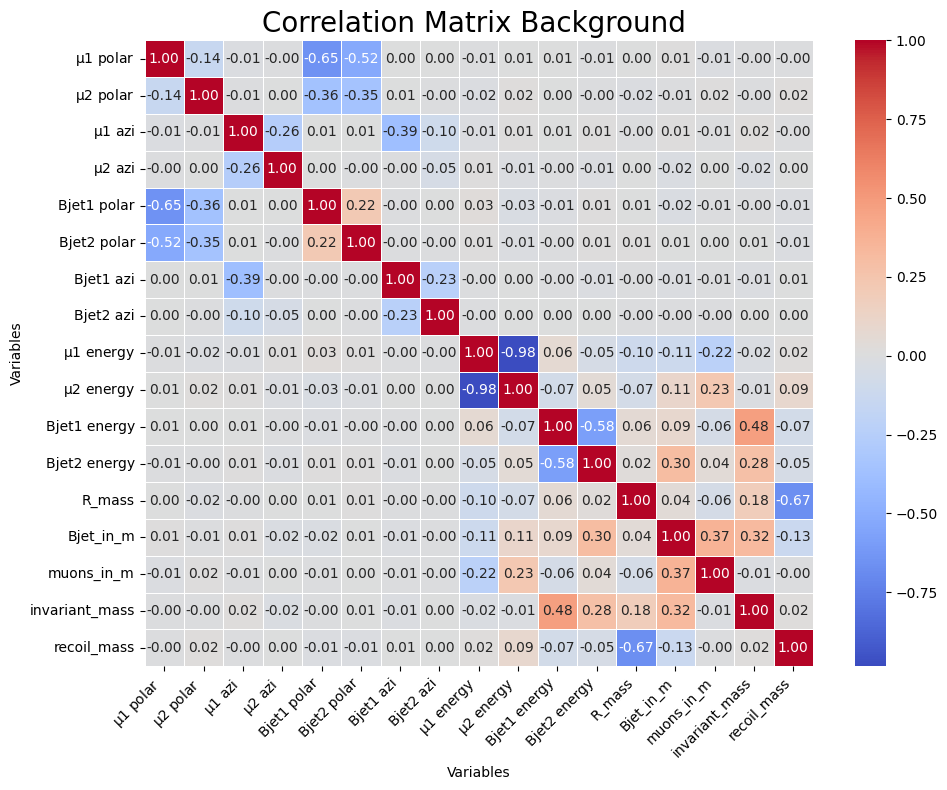

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix2 = back_ground1.corr()

# Create a correlation matrix plot
plt.figure(figsize=(10, 8))  # Increase the plot size for better visibility
sns.heatmap(corr_matrix2, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix Background ', fontsize=20)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Ensure y-axis labels are not rotated
plt.tight_layout()

plt.show()


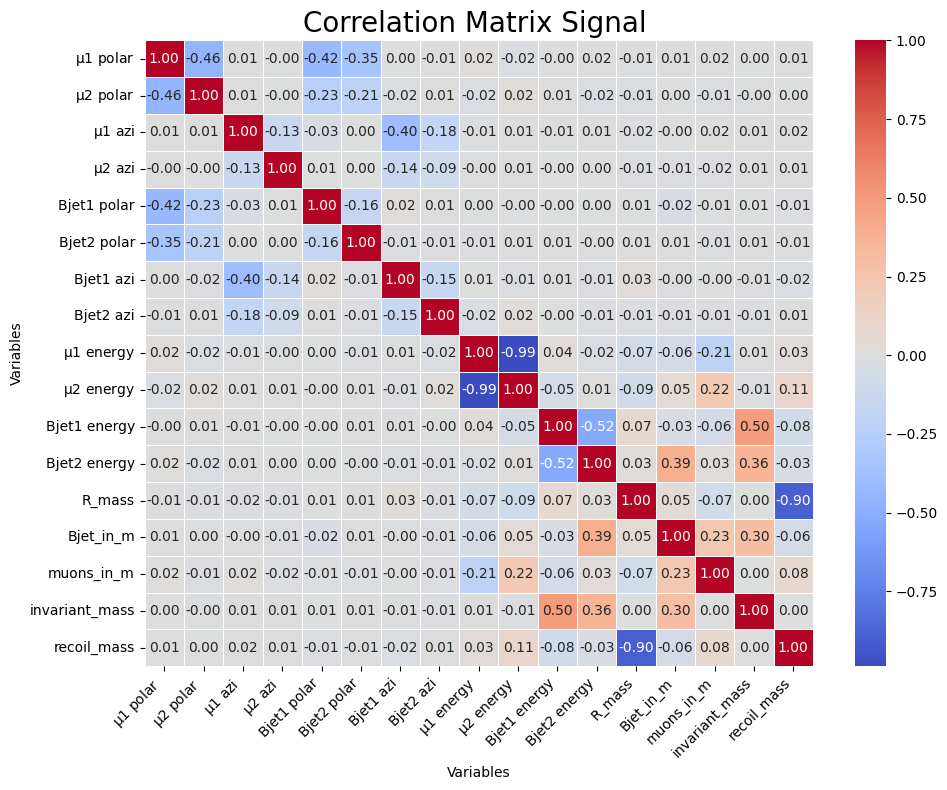

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix2 = signal_run5.corr()

# Create a correlation matrix plot
plt.figure(figsize=(10, 8))  # Increase the plot size for better visibility
sns.heatmap(corr_matrix2, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix Signal ', fontsize=20)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Ensure y-axis labels are not rotated
plt.tight_layout()

plt.show()

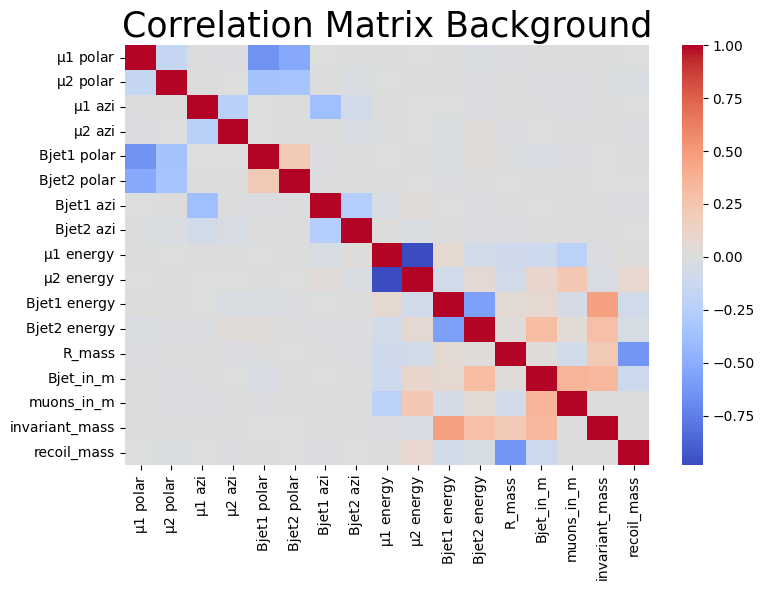

In [59]:
corr_matrix1 = back_ground.corr()

# Create a correlation matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix1, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Background', fontsize=25)
plt.tight_layout()
# plt.savefig('Cor_Bk.pdf')
plt.show()

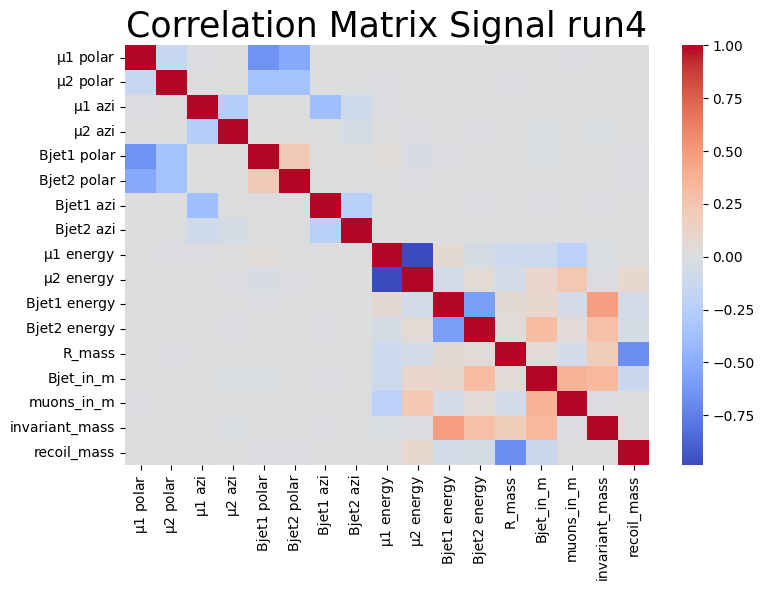

In [60]:
corr_matrix2 = back_ground1.corr()

# Create a correlation matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix2, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Signal run4', fontsize=25)
plt.tight_layout()

plt.show()

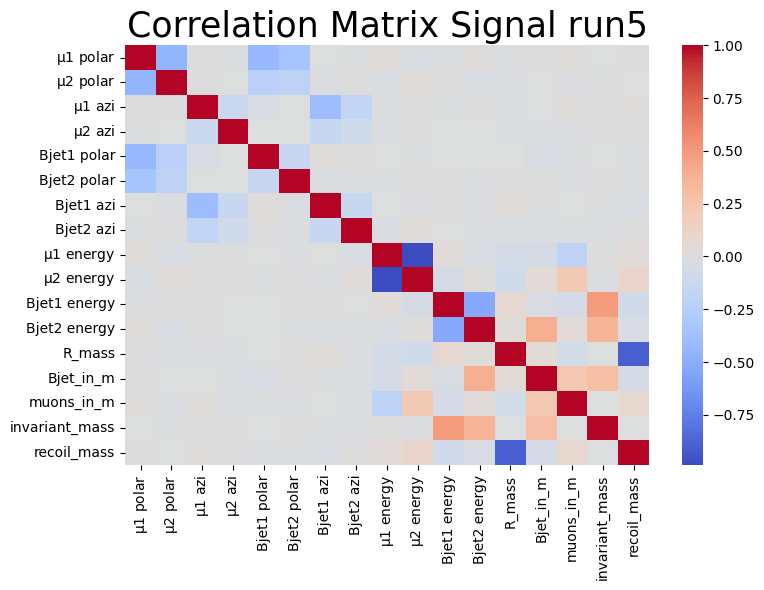

In [61]:
corr_matrix3 = signal_run5.corr()

# Create a correlation matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix3, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Signal run5', fontsize=25)
plt.tight_layout()
# plt.savefig('Cor_Sg5.pdf')
plt.show()

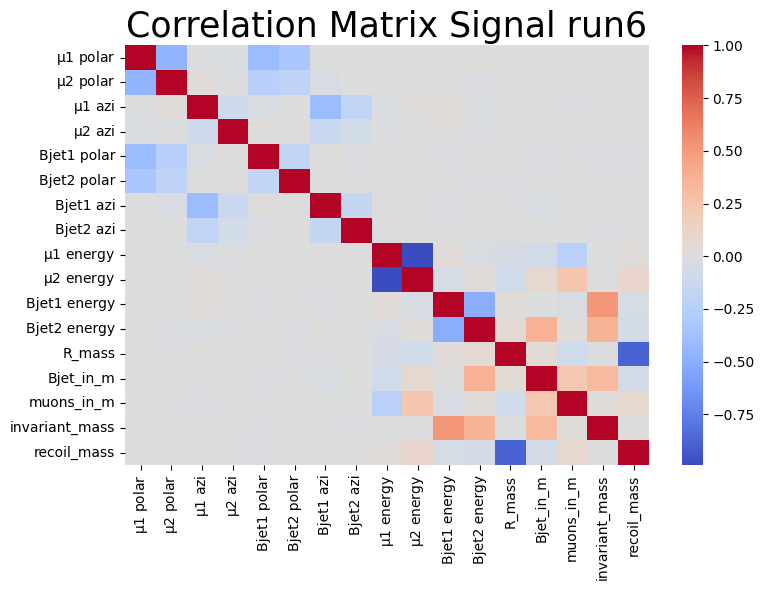

In [62]:
corr_matrix4 = signal_run6.corr()

# Create a correlation matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix4, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Signal run6', fontsize=25)
plt.tight_layout()
# plt.savefig('Cor_Sg6.pdf')
plt.show()

In [63]:
def draw(feature):
   sigtmp1=back_ground1[feature]
   sigtmp2=signal_run5[feature]
   sigtmp3=signal_run6[feature]
   bkgtmp=back_ground[feature]
   
   from matplotlib.lines import Line2D

   rng = np.random.default_rng(seed=123)

   weig1 = np.ones_like(back_ground1[feature]) / float(len(back_ground1[feature]))
   weig2 = np.ones_like(signal_run5[feature]) / float(len(signal_run5[feature]))
   weig3 = np.ones_like(signal_run6[feature]) / float(len(signal_run6[feature]))
   weigh2 = np.ones_like(back_ground[feature]) / float(len(back_ground[feature]))
   
   fig, ax = plt.subplots(figsize=(9,5))
   ax.hist(bkgtmp, bins=35, histtype='step', range=(70,120), weights=weigh2, label=r'Background', alpha=.7, linewidth=2)
   ax.hist(sigtmp1, bins=35, histtype='step', range=(70,120), weights=weig1, label=r'$m_{S}$ = 95 GeV', alpha=.7, linewidth=2)
   ax.hist(sigtmp2, bins=35, histtype='step', range=(70,120), weights=weig2, label=r'$m_{S}$ = 95.5 GeV', alpha=.7, linewidth=2)
   ax.hist(sigtmp3, bins=35, histtype='step', range=(70,120), weights=weig3, label=r'$m_{S}$ = 96 GeV', alpha=.7, linewidth=2)
   


   plt.ylabel('Normalised to unity', fontsize=28, labelpad=15)
   plt.xlabel('$M_{reco}$ [GeV]', fontsize=30, labelpad=15)
   plt.xticks(fontsize=25, rotation=0)
   plt.yticks(fontsize=25)
#    plt.legend(fontsize=15)
   plt.tight_layout()
   plt.legend(fontsize=15, loc='upper left', frameon=False)
#    plt.ylabel('Events')
#    plt.xlabel(feature)
   plt.savefig(feature+'.pdf')
   plt.show()

draw('recoil_mass')

In [64]:
'''
draw('$\mu$1 polar')
draw('$\mu$2 polar')
draw('$\mu$1 azi')
draw('$\mu$2 azi')
draw('Bjet1 polar')
draw('Bjet2 polar')
draw('Bjet1 azi')
draw('Bjet2 azi')
draw('$\mu$1 energy')
draw('$\mu$2 energy')
draw('Bjet1 energy')
draw('Bjet2 energy')
draw('muons_in_m')
draw('recoil_mass')
draw('R_mass')
draw('Bjet_in_m')
draw('invariant_mass')

'''

"\ndraw('$\\mu$1 polar')\ndraw('$\\mu$2 polar')\ndraw('$\\mu$1 azi')\ndraw('$\\mu$2 azi')\ndraw('Bjet1 polar')\ndraw('Bjet2 polar')\ndraw('Bjet1 azi')\ndraw('Bjet2 azi')\ndraw('$\\mu$1 energy')\ndraw('$\\mu$2 energy')\ndraw('Bjet1 energy')\ndraw('Bjet2 energy')\ndraw('muons_in_m')\ndraw('recoil_mass')\ndraw('R_mass')\ndraw('Bjet_in_m')\ndraw('invariant_mass')\n\n"

In [65]:
 #draw('R_mass')

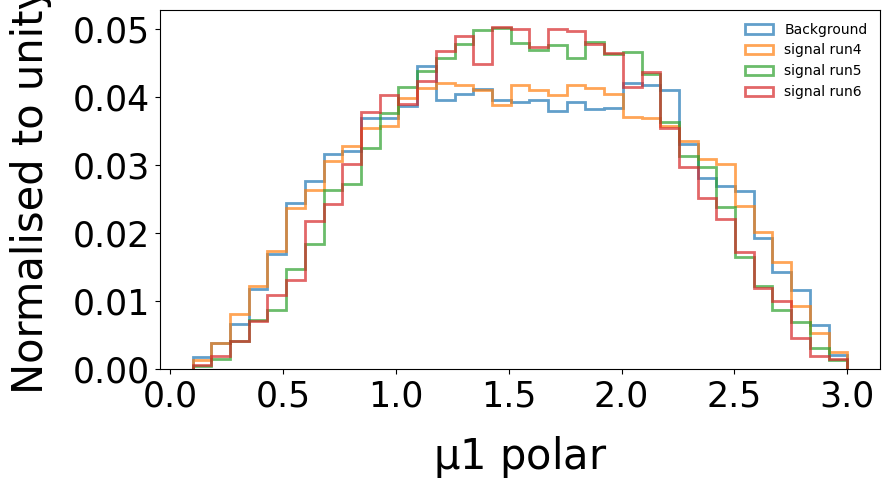

In [66]:

from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

weig1 = np.ones_like(back_ground1['$\mu$1 polar']) / float(len(back_ground1['$\mu$1 polar']))
weig2 = np.ones_like(signal_run5['$\mu$1 polar']) / float(len(signal_run5['$\mu$1 polar']))
weig3 = np.ones_like(signal_run6['$\mu$1 polar']) / float(len(signal_run6['$\mu$1 polar']))
weigh2 = np.ones_like(back_ground['$\mu$1 polar']) / float(len(back_ground['$\mu$1 polar']))

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(back_ground['$\mu$1 polar'], bins=35, range=(0.1,3), histtype='step', weights=weigh2, label=r'Background', alpha=.7, linewidth=2)
ax.hist(back_ground1['$\mu$1 polar'], bins=35, range=(0.1,3), histtype='step', weights=weig1, label=r'signal run4', alpha=.7, linewidth=2)
ax.hist(signal_run5['$\mu$1 polar'], bins=35, range=(0.1,3), histtype='step', weights=weig2, label=r'signal run5', alpha=.7, linewidth=2)
ax.hist(signal_run6['$\mu$1 polar'], bins=35, range=(0.1,3), histtype='step', weights=weig3, label=r'signal run6', alpha=.7, linewidth=2)



plt.ylabel('Normalised to unity', fontsize=30, labelpad=15)
plt.xlabel('$\mu$1 polar', fontsize=30, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
plt.legend(loc='upper right', frameon=False)

In [67]:
def compare_histograms_overlay(back_ground1, signal_run6, nbins=50, columns=None):
    # Plot continuum suppression variable distributions for signal and background
    colors = ['#54ff9f', '#4e6bbd', '#cc0000', '#ffff00', '#ffa500']

    for variable in columns:
        d_sig = signal_run6[variable].values
        d_bkg = back_ground1[variable].values

        plt.hist(d_sig, color=colors[0], label='Signal', alpha=0.6, bins=nbins, density=True)
        plt.hist(d_bkg, color=colors[1], label='Background', alpha=0.6, bins=nbins, density=True)

        plt.title(variable)
        plt.xlabel(variable)
        plt.ylabel('Normalized events/bin')
        plt.legend(loc='best')
        plt.show()
        plt.clf()  # Clear the current figure

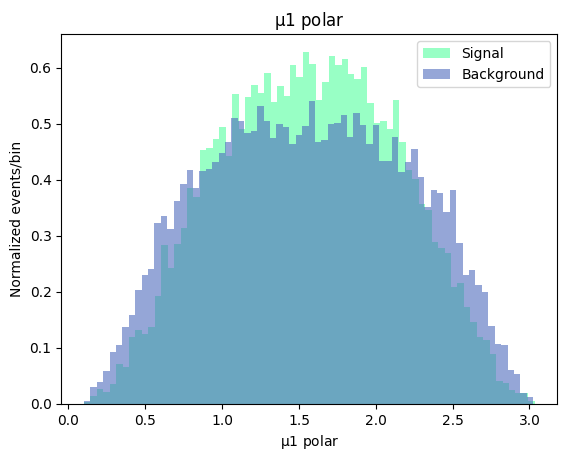

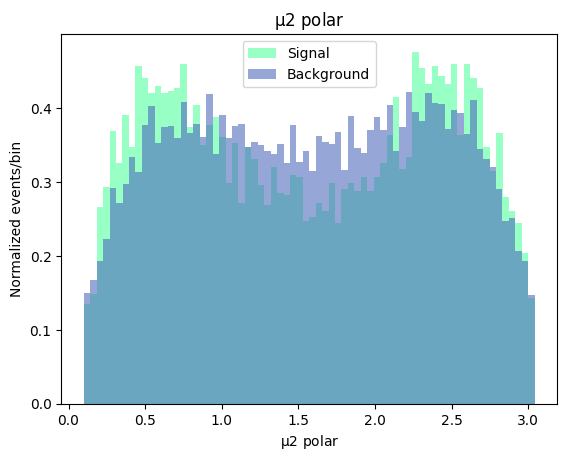

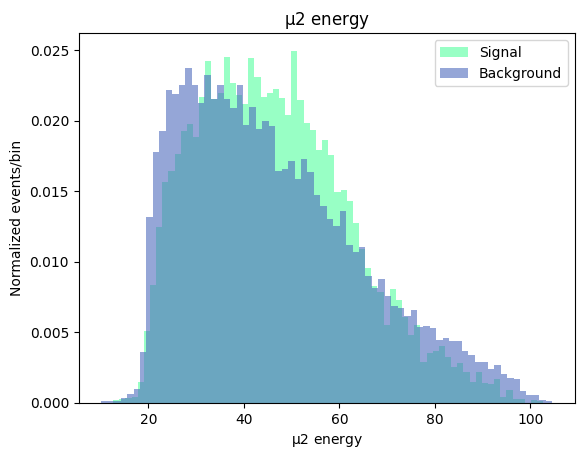

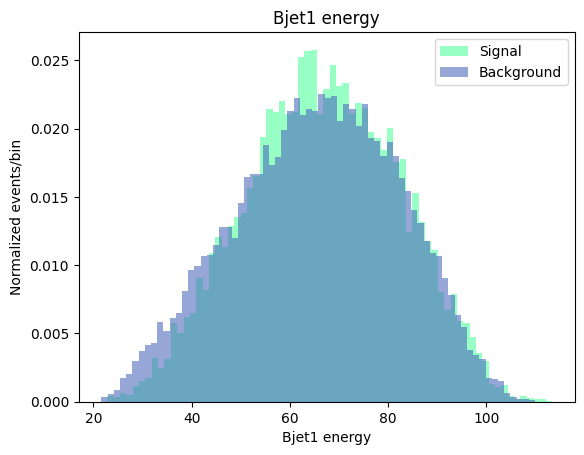

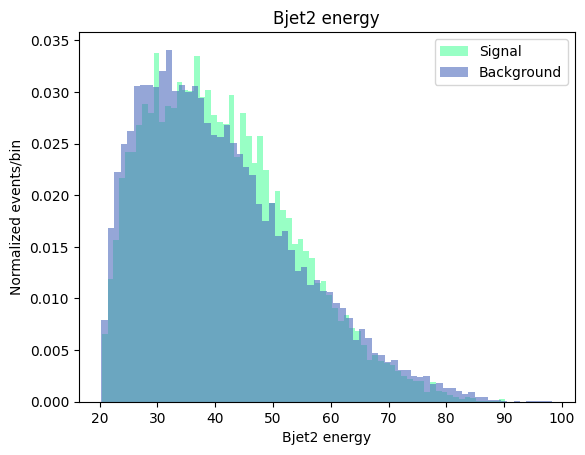

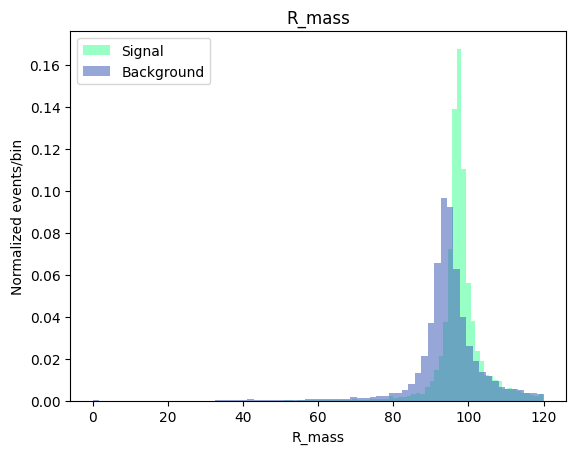

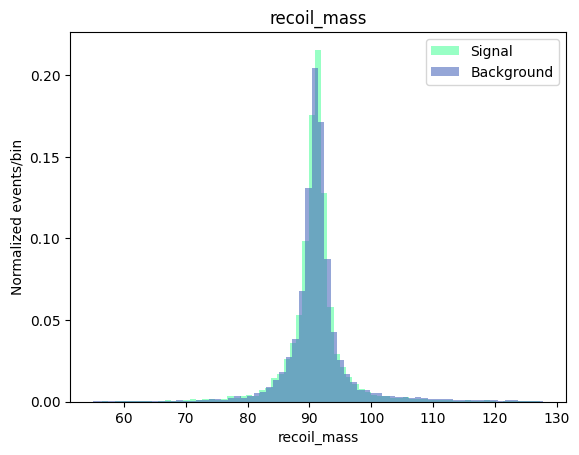

<Figure size 640x480 with 0 Axes>

In [68]:
compare_histograms_overlay(back_ground1, signal_run6, nbins=70, columns=['$\mu$1 polar', '$\mu$2 polar', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy', 'R_mass', 'recoil_mass'])


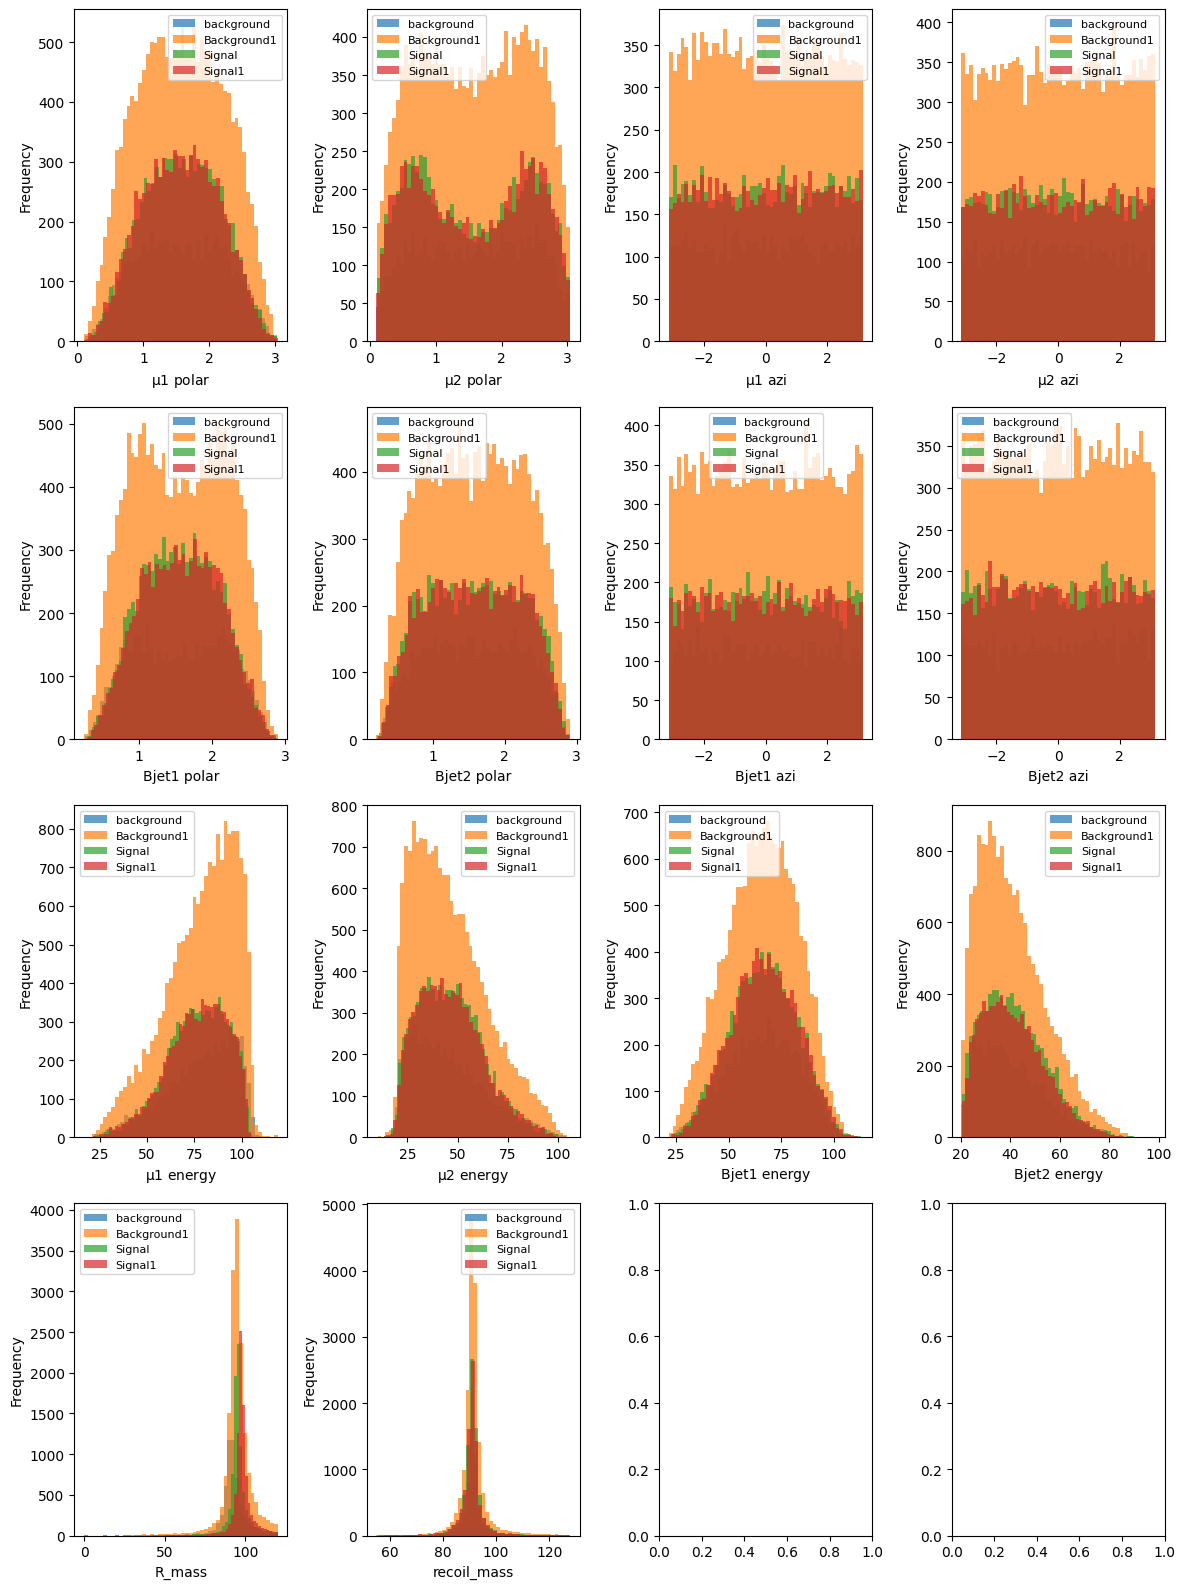

In [69]:
import matplotlib.pyplot as plt

variables= ['$\mu$1 polar', '$\mu$2 polar', '$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy','R_mass', 'recoil_mass'] # Approved variables

fig, axs = plt.subplots(4, 4, figsize=(12, 16))
for i, variable in enumerate(variables):
    axs[i // 4, i % 4].hist(back_ground[variable], bins=50, label='background', alpha=0.7)
    axs[i // 4, i % 4].hist(back_ground1[variable], bins=50, label='Background1', alpha=0.7)
    axs[i // 4, i % 4].hist(signal_run5[variable], bins=50, label='Signal', alpha=0.7)
    axs[i // 4, i % 4].hist(signal_run6[variable], bins=50, label='Signal1', alpha=0.7)
    axs[i // 4, i % 4].set_xlabel(variable, fontsize=10)
    axs[i // 4, i % 4].set_ylabel('Frequency', fontsize=10)
    axs[i // 4, i % 4].legend(fontsize=8)

plt.tight_layout()
plt.show()

In [70]:
#signal_run6 = signal_run6[['$\mu$1 polar', '$\mu$2 polar', '$\mu$1 azi', '$\mu$2 azi',
    #   'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy',
    #   '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy', 'invariant_mass', 'R_mass']]

This five variables will be your training data

In [71]:
back_ground

,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass
8,1.357597,1.353218,-1.729966,0.002908,2.004714,1.911129,1.830962,2.512553,68.909316,56.332325,67.487915,21.354692,90.362611,36.576876,26.742800,25.200263,92.761174
9,0.616479,1.122675,0.515505,-2.659023,2.619601,1.889712,3.110301,-0.183348,83.539116,42.265921,82.830416,37.669088,88.790224,93.061655,91.451261,86.680671,90.791065
11,0.679374,1.309550,-2.975760,0.987518,1.775399,2.642194,-1.485576,0.996499,79.935131,44.290566,49.644615,62.274957,93.130946,80.643540,82.346381,86.309341,92.654237
12,1.555563,1.149363,-2.029638,-0.237668,2.310731,1.052047,0.972296,1.992174,88.600918,33.305271,38.640869,28.426163,99.162127,41.677389,26.542388,47.489689,83.942071
13,1.439820,1.532563,1.348446,-0.584271,1.559919,1.926762,-1.819718,2.581182,90.454850,36.131634,84.085287,32.022054,86.562001,25.144293,14.221283,83.778841,93.791510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9470,0.582795,2.579892,-3.022654,-2.844540,1.778887,2.078501,1.108281,-0.656010,93.941111,30.950465,52.264045,58.413479,91.325975,44.409578,104.635242,81.175741,90.810615
9471,1.540360,0.406617,-1.100350,1.362832,2.518717,1.498726,2.991359,-0.198008,39.555042,84.338495,89.804982,24.533552,94.018367,85.270969,100.181064,84.892900,92.407303
9472,1.689968,1.255198,-2.758569,1.869465,1.328793,2.365596,0.080405,-1.741576,73.509580,46.817879,84.348287,31.541677,103.065476,52.682956,25.960562,84.799142,87.661440
9473,2.124847,1.961308,-3.036768,1.452184,1.146229,0.916407,-1.344973,0.541816,67.618384,55.138060,61.413537,46.443690,96.994845,56.345088,57.438460,75.278068,85.220863


In [72]:
back_ground1

,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass
0,0.900516,1.004732,0.094834,-2.658204,2.411587,1.684452,3.006877,-0.152982,82.876321,41.529498,92.841208,27.473887,95.398638,82.180914,74.009103,90.179173,93.828619
2,2.125666,1.565827,-0.406838,1.515356,1.413081,0.885634,-2.319733,1.468686,69.859217,56.297310,79.093887,27.079467,90.694798,40.464129,50.347280,81.033115,100.933771
4,1.501403,0.300558,2.355910,-1.721713,2.543419,1.627530,-1.034996,1.021502,50.664276,72.788555,80.918456,33.374534,97.864162,83.195964,100.216858,81.305407,90.436791
5,1.785758,2.286816,-3.080689,-0.924726,0.648338,2.332771,0.142906,0.654641,89.714296,34.929532,84.322878,33.087329,94.772865,90.854325,50.396983,81.163340,89.114202
6,2.263549,2.171063,1.281466,-2.639235,1.041866,0.687479,-0.603504,3.070873,74.189511,50.521100,72.634999,41.111328,94.596534,71.920460,76.130058,80.944423,90.437076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28680,2.066239,1.723086,-3.130873,-1.259102,1.094680,1.399568,0.170861,2.250109,78.017091,44.473791,85.614172,27.718748,100.291420,49.250078,48.232429,80.573568,90.707532
28682,1.306710,2.869056,-0.749225,-2.519839,1.292624,1.798143,1.787196,-2.947731,91.788556,36.069419,80.345794,39.841510,85.876786,34.521648,81.742110,82.266848,92.885163
28684,2.166543,1.828165,-1.842353,1.609886,1.138117,0.958407,2.034271,0.074061,99.795054,23.983465,69.907514,52.097985,97.028605,62.883743,64.251132,88.196855,88.042509
28685,1.812273,0.106909,1.365460,0.453014,2.514721,1.115741,-1.510470,2.851506,46.461520,79.303751,87.487327,24.246561,91.766956,85.543457,113.783007,80.915662,93.028010


In [73]:
signal_run5

,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass
0,1.938422,2.205027,-2.298657,-0.334310,1.350935,0.625028,1.994317,-0.064871,61.427752,61.672895,32.476465,36.123274,95.378313,45.284413,60.862530,51.478165,90.262650
1,0.820721,1.181685,2.393981,-1.606220,2.180251,2.186811,-0.365903,2.189918,67.763295,46.332952,81.071540,40.115951,116.615704,71.016490,66.868741,89.892760,86.216585
2,2.202081,1.519480,-1.817931,2.832273,1.000290,1.503203,0.002178,1.757583,73.008902,42.079472,80.166636,48.240331,114.469031,58.902191,55.245393,93.796742,81.475268
3,1.218296,0.589221,-0.432411,-3.006438,2.206529,2.291404,2.545955,-0.121079,49.905568,73.640804,55.627550,49.154750,94.202759,66.821581,86.959079,79.875754,92.048296
4,1.943731,0.606526,-1.825569,2.850053,1.209176,1.986974,0.581595,1.241902,86.545639,36.987574,49.190441,39.696047,94.237675,36.725373,70.154247,44.987477,91.889854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9183,1.826574,1.778638,-2.293167,-0.322366,0.785749,1.952196,2.054008,0.747980,83.848284,40.259341,63.646631,45.837959,92.701312,68.016193,29.652762,81.093280,94.274937
9184,2.378192,0.636558,-0.226452,-1.075896,0.994934,1.582669,1.899624,-2.753790,88.662708,33.607425,63.067766,51.872286,97.530918,48.603336,91.345679,83.513833,88.342317
9185,2.082957,0.195931,1.271674,-0.757094,1.396692,1.439729,-2.505853,-0.646217,95.466453,27.673313,65.484476,41.525612,95.275720,21.632418,85.514229,82.918083,90.664230
9186,1.518808,0.327841,-0.739767,-3.107193,2.145883,2.384382,1.684311,-1.617548,45.949933,74.780277,70.173430,36.268324,101.401386,66.255719,98.389102,77.654869,90.079353


In [74]:
signal_run6

,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass
0,1.461140,0.499583,-2.740638,-0.443872,2.209600,2.166511,2.384852,-0.012866,43.614872,80.121548,67.511498,46.548117,95.701419,68.128649,92.897611,86.070640,92.341604
1,1.268269,2.294211,0.307418,1.933374,0.910068,2.326384,-2.811301,-1.875587,82.406119,40.903481,70.147679,48.789740,96.809978,77.517527,57.041925,86.567754,91.306361
2,1.184868,0.260631,-1.118999,1.992050,2.469143,2.182663,-3.045017,0.368096,40.243510,77.921014,77.119474,45.342527,109.291856,88.786095,103.307068,85.991079,74.075589
3,1.639216,1.513538,-1.838085,2.696802,1.399699,1.988010,1.360171,-0.358791,66.925047,46.425288,60.475707,39.911276,119.799016,32.937025,7.262048,76.865858,85.622542
4,0.661743,2.474140,-2.253262,-1.758920,1.998097,1.563730,1.510376,-0.256867,82.785935,39.502003,72.344964,34.574750,99.413292,39.825718,96.337242,77.399120,91.668455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,1.384326,1.558705,1.973389,-2.215169,1.908474,1.087609,-0.539142,-2.553996,82.788928,31.580593,92.322271,26.111408,117.652927,45.735593,18.077444,85.953444,88.246110
9177,0.918637,2.432360,0.239939,0.499683,2.223002,0.527040,-2.777747,-2.679000,62.117895,58.320967,67.102471,51.694695,103.959323,88.745767,82.917308,88.732760,83.415070
9178,1.519389,2.964514,-1.413875,1.324924,1.191695,0.634621,1.313299,-2.215928,34.331846,86.142351,42.429263,52.922338,103.874315,64.982283,109.852949,74.276474,84.683663
9179,1.375489,0.925721,1.676880,-0.554356,1.916306,1.733967,-1.370390,2.807566,88.883885,34.541678,70.056228,32.238291,96.510053,37.488550,45.344086,81.093204,91.524087


# Model Implementation 

In [75]:
# Label our data, background is zero and signal is one

back_ground1['isSignal']= 0
back_ground['isSignal']= 0
signal_run5['isSignal']= 1
signal_run6['isSignal']= 1

In [76]:

df_Bacg= pd.concat([ back_ground1, back_ground])
df_Sig = df_Bacg.sample(frac=1)
print(df_Bacg.shape)
df_Bacg.head()

(22715, 18)


,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass,isSignal
0,0.900516,1.004732,0.094834,-2.658204,2.411587,1.684452,3.006877,-0.152982,82.876321,41.529498,92.841208,27.473887,95.398638,82.180914,74.009103,90.179173,93.828619,0
2,2.125666,1.565827,-0.406838,1.515356,1.413081,0.885634,-2.319733,1.468686,69.859217,56.297310,79.093887,27.079467,90.694798,40.464129,50.347280,81.033115,100.933771,0
4,1.501403,0.300558,2.355910,-1.721713,2.543419,1.627530,-1.034996,1.021502,50.664276,72.788555,80.918456,33.374534,97.864162,83.195964,100.216858,81.305407,90.436791,0
5,1.785758,2.286816,-3.080689,-0.924726,0.648338,2.332771,0.142906,0.654641,89.714296,34.929532,84.322878,33.087329,94.772865,90.854325,50.396983,81.163340,89.114202,0
6,2.263549,2.171063,1.281466,-2.639235,1.041866,0.687479,-0.603504,3.070873,74.189511,50.521100,72.634999,41.111328,94.596534,71.920460,76.130058,80.944423,90.437076,0


In [77]:

df_Sig= pd.concat([ signal_run5, signal_run6])
df_Sig = df_Sig.sample(frac=1)
print(df_Sig.shape)
df_Sig.head()


(17719, 18)


,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass,isSignal
306,0.406969,1.669611,0.311521,2.972658,2.230563,2.341418,-0.534016,3.114499,90.913586,32.368859,58.637346,54.962175,96.880078,75.028796,102.702205,83.389708,92.057480,1
4894,0.911233,2.248639,-2.034306,2.970837,1.448084,1.846195,-0.011668,1.892188,62.966294,62.664843,68.303020,37.986323,90.616793,25.196807,77.890632,84.089804,97.581922,1
6846,2.190574,2.135962,0.767449,-1.904235,1.029969,0.829452,-3.013072,-0.228776,85.322916,38.231501,80.060344,39.081788,96.175690,69.566473,70.104928,88.759695,92.158936,1
4579,2.088694,1.547354,-0.687894,-2.561536,1.095643,1.486878,2.443611,0.604495,84.226073,39.487792,74.716277,37.476482,93.757205,45.002741,51.121374,82.528902,91.935835,1
8404,1.752148,1.697749,-2.366212,-0.835713,1.606909,1.105977,1.682027,0.013623,82.195606,35.317066,80.665762,47.902210,110.772902,39.562202,19.518846,93.029693,73.790582,1


signal_run41 = signal_run4.sample(frac=0.7, random_state=99)

signal_run51 = signal_run5.sample(frac=0.14, random_state=99)

In [78]:
df_all = pd.concat([df_Sig, df_Bacg])
df_all= shuffle(df_all)
df_all

,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass,isSignal
7024,2.462345,0.830694,-3.110246,-0.406978,2.419347,0.258415,-0.042520,0.447576,97.883601,25.719825,31.802102,80.739923,97.478701,104.710771,93.810230,89.966293,98.953242,0
7156,0.936180,2.197041,-1.635536,-0.511424,1.763924,2.160725,1.840904,2.566826,72.732632,47.766212,77.682670,25.812627,103.814979,36.533106,71.118869,36.098151,86.048482,1
21592,1.961155,0.161050,2.819404,2.649416,1.746915,1.412968,0.190644,-1.350754,85.219795,39.228751,72.133924,44.062278,95.286604,25.513587,90.804966,80.521611,90.665477,0
8398,1.476086,1.166800,-2.063317,2.486908,1.524433,2.315874,0.933843,-0.736707,76.256428,47.854777,76.175180,45.734143,93.437786,54.743266,31.992882,88.253417,90.032316,0
790,1.194768,2.344609,2.578592,-2.716773,1.295016,1.614475,-0.794509,0.840701,59.845625,59.581347,75.226819,40.334756,104.565100,30.394967,67.851993,81.471712,79.685670,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022,1.118620,2.668723,-3.067845,-2.169097,1.913615,0.903565,0.902285,-0.392604,72.926648,49.887795,50.790547,53.575485,96.125566,54.960585,85.342023,74.915130,90.833760,1
570,2.060410,1.838741,0.515906,-1.497152,1.190509,1.074288,2.597825,-1.761029,83.249699,40.125034,58.575553,37.742962,94.657170,44.535644,51.390448,71.617196,91.007212,1
23179,0.987598,2.997829,-2.589085,0.031559,2.352925,1.109647,0.016150,1.246643,99.220331,25.170856,67.904071,42.648356,95.436976,70.447035,89.463612,80.513762,90.748631,0
858,2.294430,1.053973,2.535508,-1.247489,0.602182,2.154633,0.086027,-1.266710,101.080574,22.568475,87.465101,34.172822,95.929389,93.792612,78.698676,90.216586,91.852668,1


In [79]:
num_rows = len(df_Bacg)
df_Bacg['weights'] = np.random.rand(num_rows)
num_rows = len(df_Sig)
df_Sig['weights'] = np.random.rand(num_rows)


In [80]:
num_rows = len(df_all)
df_all['weights'] = np.random.rand(num_rows)


In [81]:
import numpy as np

def initialize_weights(layers):
    weights = []
    for i in range(1, len(layers)):
        n_input = layers[i - 1]
        n_output = layers[i]
        
        # Sample random values from a Gaussian distribution with mean 0 and std
        weight = np.random.randn(n_input, n_output)
        
        # Normalize the weights
        weight /= np.sqrt(n_input)
        
        weights.append(weight)
    return weights

# Assuming you have the number of neurons for each layer in a list `layer_sizes`.
# For example, if you have 12 input neurons, 8 neurons in the hidden layer, and 1 output neuron:
layer_sizes = [12, 8, 1]
weights = initialize_weights(layer_sizes)


signal_run61 = signal_run6.sample(frac=0.14, random_state=99)

In [82]:
df_all=df_all.dropna()
df_all
#invariant_mass ,recoil_mass,muons_in_m ,Bjet_in_m ,Bjet_in_m ,R_mass, Bjet2 energy	,Bjet1 energy ,Bjet1 azi

,$\mu$1 polar,$\mu$2 polar,$\mu$1 azi,$\mu$2 azi,Bjet1 polar,Bjet2 polar,Bjet1 azi,Bjet2 azi,$\mu$1 energy,$\mu$2 energy,Bjet1 energy,Bjet2 energy,R_mass,Bjet_in_m,muons_in_m,invariant_mass,recoil_mass,isSignal,weights
7024,2.462345,0.830694,-3.110246,-0.406978,2.419347,0.258415,-0.042520,0.447576,97.883601,25.719825,31.802102,80.739923,97.478701,104.710771,93.810230,89.966293,98.953242,0,0.351433
7156,0.936180,2.197041,-1.635536,-0.511424,1.763924,2.160725,1.840904,2.566826,72.732632,47.766212,77.682670,25.812627,103.814979,36.533106,71.118869,36.098151,86.048482,1,0.671173
21592,1.961155,0.161050,2.819404,2.649416,1.746915,1.412968,0.190644,-1.350754,85.219795,39.228751,72.133924,44.062278,95.286604,25.513587,90.804966,80.521611,90.665477,0,0.953996
8398,1.476086,1.166800,-2.063317,2.486908,1.524433,2.315874,0.933843,-0.736707,76.256428,47.854777,76.175180,45.734143,93.437786,54.743266,31.992882,88.253417,90.032316,0,0.992264
790,1.194768,2.344609,2.578592,-2.716773,1.295016,1.614475,-0.794509,0.840701,59.845625,59.581347,75.226819,40.334756,104.565100,30.394967,67.851993,81.471712,79.685670,1,0.052338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022,1.118620,2.668723,-3.067845,-2.169097,1.913615,0.903565,0.902285,-0.392604,72.926648,49.887795,50.790547,53.575485,96.125566,54.960585,85.342023,74.915130,90.833760,1,0.478737
570,2.060410,1.838741,0.515906,-1.497152,1.190509,1.074288,2.597825,-1.761029,83.249699,40.125034,58.575553,37.742962,94.657170,44.535644,51.390448,71.617196,91.007212,1,0.541365
23179,0.987598,2.997829,-2.589085,0.031559,2.352925,1.109647,0.016150,1.246643,99.220331,25.170856,67.904071,42.648356,95.436976,70.447035,89.463612,80.513762,90.748631,0,0.587389
858,2.294430,1.053973,2.535508,-1.247489,0.602182,2.154633,0.086027,-1.266710,101.080574,22.568475,87.465101,34.172822,95.929389,93.792612,78.698676,90.216586,91.852668,1,0.095607


b4_data = b4_data.dropna()

b5_data = b5_data.dropna()

b6_data = b6_data.dropna()

To check how much data you have for both labels

In [83]:
import numpy as np

def initialize_weights(layers):
    weights = []
    for i in range(1, len(layers)):
        n_input = layers[i - 1]
        n_output = layers[i]
        
        # Sample random values from a Gaussian distribution with mean 0 and std
        weight = np.random.randn(n_input, n_output)
        
        # Normalize the weights
        weight /= np.sqrt(n_input)
        
        weights.append(weight)
    return weights

# Assuming you have the number of neurons for each layer in a list `layer_sizes`.
# For example, if you have 12 input neurons, 8 neurons in the hidden layer, and 1 output neuron:
layer_sizes = [12, 8, 1]
weights = initialize_weights(layer_sizes)


In [84]:
df_Bacg['weights']=df_Bacg['weights']/df_Bacg['weights'].sum(axis=0)
df_Sig['weights']=df_Sig['weights']/df_Sig['weights'].sum(axis=0)

# Note: Number of events remain unchanged after this "normalization procedure"
print("Number SIG events=", len(df_Sig['weights']))
print("Number BKG events=", len(df_Bacg['weights']))

Number SIG events= 17719
Number BKG events= 22715


In [85]:
df_all[df_all['isSignal']==0].shape, df_all[df_all['isSignal']==1].shape

((22715, 19), (17719, 19))

Split the data into training data which is your X and what you want to teach the model is to learn how to predict Y

In [86]:
import pandas as pd
from itertools import chain

#nn_variables = [['$\mu$1 polar', '$\mu$2 polar', '$\mu$1 azi', '$\mu$2 azi',
                #'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi',
                #'$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy']]
#nn_variables =['$\mu$1 polar', '$\mu$2 polar', '$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi']
#nn_variables = ['$\mu$1 polar', '$\mu$2 polar', '$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy','R_mass', 'recoil_mass'] # Approved variables
nn_variables = ['$\mu$1 polar','$\mu$2 polar','$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy', 'R_mass', 'Bjet_in_m', 'muons_in_m', 'invariant_mass', 'recoil_mass']
#nn_variables = ['$\mu$1 polar', '$\mu$2 polar', '$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar']#, 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy','R_mass', 'recoil_mass'] # Approved variables

df_input = df_all.filter(nn_variables)
df_target = df_all.filter(['isSignal'])
df_weights = df_all.filter(['weights'])


You train with 70% of the data and test with the remainig 30%

In [87]:

inputs=len(nn_variables)
print("Number nn input variables=",inputs)
print("NN input variables=",nn_variables)
X  = np.asarray( df_input.values ).astype(np.float32)
Y  = np.asarray( df_target.values ).astype(np.float32)
W  = np.asarray( df_weights.values ).astype(np.float32)
print(X.shape)
print(Y.shape)
print(W.shape)
print('\n')

Number nn input variables= 17
NN input variables= ['$\\mu$1 polar', '$\\mu$2 polar', '$\\mu$1 azi', '$\\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi', '$\\mu$1 energy', '$\\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy', 'R_mass', 'Bjet_in_m', 'muons_in_m', 'invariant_mass', 'recoil_mass']
(40434, 17)
(40434, 1)
(40434, 1)




# Artificial Neural Network

# Data spliting

In [88]:

size = int(len(X[:, 0]))
test_size = int(0.2 * len(X[:, 0]))  # Changed test_size to 30% of the total data size.

print('X (features) before splitting')
print('\n')
print(X.shape)

print('X (features) splitting between test and training')
X_test = X[0 : test_size + 1, :]
print('Test:')
print(X_test.shape)

X_train_val = X[test_size + 1 : len(X[:, 0]), :]
print('Training:')
print(X_train_val.shape)
print('\n')

print('Y (target) before splitting')
print('\n')
print(Y.shape)

print('Y (target) splitting between test and training ')
Y_test = Y[0 : test_size + 1, :]
print('Test:')
print(Y_test.shape)

Y_train_val = Y[test_size + 1 : len(Y[:, 0]), :]
print('Training:')
print(Y_train_val.shape)
print('\n')

print('W (weights) before splitting')
print('\n')
print(W.shape)

print('W (weights) splitting between test and training ')
W_test = W[0 : test_size + 1, :]
print('Test:')
print(W_test.shape)

W_train_val = W[test_size + 1 : len(W[:, 0]), :]
print('Training:')
print(W_train_val.shape)
print('\n')


X (features) before splitting


(40434, 17)
X (features) splitting between test and training
Test:
(8087, 17)
Training:
(32347, 17)


Y (target) before splitting


(40434, 1)
Y (target) splitting between test and training 
Test:
(8087, 1)
Training:
(32347, 1)


W (weights) before splitting


(40434, 1)
W (weights) splitting between test and training 
Test:
(8087, 1)
Training:
(32347, 1)




# DNN model: Hyperparameter tuning

In [89]:
#Define Neural Network with 3 hidden layers ( #h1=10*dimention , #h2=2*dimention , #h3=dimention ) & Dropout layers
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import RMSprop


input_layer = Input(shape=(inputs,), name='input')
hidden = Dense(inputs * 10, name='hidden1', kernel_initializer='normal', activation='selu')(input_layer)
hidden = Dropout(rate=0.1)(hidden)
hidden = Dense(inputs * 2, name='hidden2', kernel_initializer='normal', activation='selu')(hidden)
hidden = Dropout(rate=0.1)(hidden)
hidden = Dense(inputs, name='hidden3', kernel_initializer='normal', activation='selu')(hidden)
hidden = Dropout(rate=0.1)(hidden)
output = Dense(1, name='output', kernel_initializer='normal', activation='sigmoid')(hidden)

#model = Model(inputs=input_layer, outputs=output)


In [90]:
model = Model(inputs=input_layer, outputs=output)
optim = Adam( lr=0.0001 )


The `lr` argument is deprecated, use `learning_rate` instead.


# Model loss

In [91]:
# print learning rate each epoch to see if reduce_LR is working as expected

def get_lr_metric(optim):
    def lr(y_true, y_pred):
        return optim.lr
    return lr

model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'], weighted_metrics=['accuracy'])


model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 17)]              0         
                                                                 
 hidden1 (Dense)             (None, 170)               3060      
                                                                 
 dropout (Dropout)           (None, 170)               0         
                                                                 
 hidden2 (Dense)             (None, 34)                5814      
                                                                 
 dropout_1 (Dropout)         (None, 34)                0         
                                                                 
 hidden3 (Dense)             (None, 17)                595       
                                                                 
 dropout_2 (Dropout)         (None, 17)                0     

# Model Accuracy

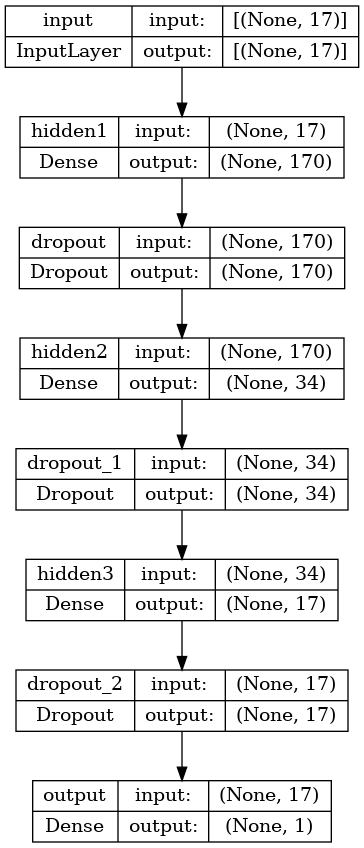

In [92]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)


# Print model training and testing results

In [93]:
# Call functions implementation to monitor the chosen metrics

import keras
from keras.callbacks import ModelCheckpoint

model_file = 'ANN_model.h5'
checkpoint = ModelCheckpoint(filepath=model_file,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)


#Stop training when a monitored metric has stopped improving
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                           mode='min',# quantity that has to be monitored(to be minimized in this case)
                              patience = 50, # Number of epochs with no improvement after which training will be stopped.
                              min_delta = 1e-7,
                              restore_best_weights = True) # update the model with the best-seen weights

#Reduce learning rate when a metric has stopped improving
reduce_LR = keras.callbacks.ReduceLROnPlateau( monitor = 'val_loss',
                                              mode='min',# quantity that has to be monitored
                                              min_delta=1e-7,
                                              factor = 0.1, # factor by which LR has to be reduced...
                                              patience = 10, #...after waiting this number of epochs with no improvements 
                                              #on monitored quantity
                                              min_lr= 0.00001 ) 
callback_list = [reduce_LR, early_stop, checkpoint]
#callback_list = [checkpoint]
#callback_list = [ early_stop, checkpoint]
# Number of training epochs
# nepochs=500
nepochs=300
# Batch size
batch=350
# Train classifier (2 minutes more or less)
history = model.fit(X_train_val[:,0:inputs], 
                    Y_train_val,
                    epochs=nepochs, 
                    sample_weight=W_train_val,
                    batch_size=batch,
                    callbacks = callback_list, 
                    verbose=1, # switch to 1 for more verbosity 
                    validation_split=0.3 ) # fix the validation dataset size
model = keras.models.load_model('ANN_model.h5')

Epoch 1/300
65/65 [==============================] - 2s 23ms/step - loss: 0.3414 - accuracy: 0.5609 - weighted_accuracy: 0.5636 - val_loss: 0.3376 - val_accuracy: 0.5672 - val_weighted_accuracy: 0.5684 - lr: 1.0000e-04
Epoch 2/300
65/65 [==============================] - 0s 4ms/step - loss: 0.3383 - accuracy: 0.5756 - weighted_accuracy: 0.5778 - val_loss: 0.3337 - val_accuracy: 0.5758 - val_weighted_accuracy: 0.5769 - lr: 1.0000e-04
Epoch 3/300
65/65 [==============================] - 0s 4ms/step - loss: 0.3350 - accuracy: 0.5876 - weighted_accuracy: 0.5874 - val_loss: 0.3296 - val_accuracy: 0.5944 - val_weighted_accuracy: 0.5992 - lr: 1.0000e-04
Epoch 4/300
65/65 [==============================] - 0s 4ms/step - loss: 0.3307 - accuracy: 0.6047 - weighted_accuracy: 0.6063 - val_loss: 0.3260 - val_accuracy: 0.6136 - val_weighted_accuracy: 0.6210 - lr: 1.0000e-04
Epoch 5/300
65/65 [==============================] - 0s 4ms/step - loss: 0.3287 - accuracy: 0.6129 - weighted_accuracy: 0.6129 

# DRAWING A DECISION TREE

color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.


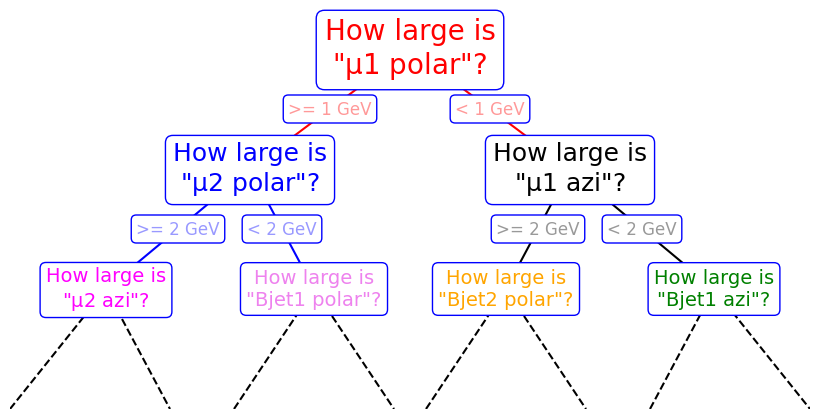

In [94]:
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('', size=24,color='red')

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict( boxstyle='round', ec='blue', fc='w' ), **kwargs)
    
    
    
    

    
    
    
    
    
text(ax, 0.5, 0.9, "How large is\n\"$\mu$1 polar\"?", 20,color='red')
text(ax, 0.3, 0.6, "How large is\n\"$\mu$2 polar\"?", 18,color='blue')
text(ax, 0.7, 0.6, "How large is\n\"$\mu$1 azi\"?", 18)
text(ax, 0.12, 0.3, "How large is\n\"$\mu$2 azi\"?", 14,color='magenta')
text(ax, 0.38, 0.3, "How large is\n\"Bjet1 polar\"?", 14,color='violet')
text(ax, 0.62, 0.3, "How large is\n\"Bjet2 polar\"?", 14,color='orange')
text(ax, 0.88, 0.3, "How large is\n\"Bjet1 azi\"?", 14,color='green')

text(ax, 0.4, 0.75, ">= 1 GeV", 12, alpha=0.4,color='red')
text(ax, 0.6, 0.75, "< 1 GeV", 12, alpha=0.4,color='red')

text(ax, 0.21, 0.45, ">= 2 GeV", 12, alpha=0.4,color='blue')
text(ax, 0.34, 0.45, "< 2 GeV", 12, alpha=0.4,color='blue')

text(ax, 0.66, 0.45, ">= 2 GeV", 12, alpha=0.4,color='black')
text(ax, 0.79, 0.45, "< 2 GeV", 12, alpha=0.4,color='black')

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k',color='red')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k',color='blue')
ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--k')
ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--k')
ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--k')
ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
ax.axis([0, 1, 0, 1])

fig.savefig('05.08-decision-tree.png')

In [95]:
# High level features:

#nn_variables = [['$\mu$1 polar', '$\mu$2 polar', '$\mu$1 azi', '$\mu$2 azi',
                #'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi',
                #'$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy']]
#nn_variables =['$\mu$1 polar', '$\mu$2 polar', '$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi']
#nn_variables = ['$\mu$1 polar', '$\mu$2 polar', '$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy','R_mass', 'recoil_mass'] # Approved variables
#nn_variables = ['$\mu$1 polar','$\mu$2 polar','$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy', 'R_mass', 'Bjet_in_m', 'muons_in_m', 'invariant_mass', 'recoil_mass']
#nn_variables = ['$\mu$1 polar', '$\mu$2 polar', '$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar']#, 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy','R_mass', 'recoil_mass'] # Approved variables



# Random Forest Implemetation 

In [96]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [97]:
from sklearn.ensemble import RandomForestClassifier

#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

# Parameter Tunning

In [98]:
size= int(len(X[:,0]))
test_size = int(0.2*len(X[:,0]))
X_test= X[0:test_size+1,:]
X_train_val= X[test_size+1:len(X[:,0]),:]
Y_test= Y[0:test_size+1,:]
Y_train_val= Y[test_size+1:len(Y[:,0]),:]
W_test= W[0:test_size+1,:]
W_train_val= W[test_size+1:len(W[:,0]),:]
size= int(len(X[:,0]))
test_size = int(0.2*len(X[:,0]))

X_train_val= X[test_size+1:len(X[:,0]),:]
Y_test= Y[0:test_size+1,:]
Y_train_val= Y[test_size+1:len(Y[:,0]),:]
W_test= W[0:test_size+1,:]
W_train_val= W[test_size+1:len(W[:,0]),:]

In [99]:
rfc=RandomForestClassifier( n_estimators=300,criterion='gini',
                           verbose=0 , min_samples_split=200, 
                           max_depth= 5,min_samples_leaf=500, 
                           max_features=5, bootstrap=False,random_state=7 )


randomforest=rfc.fit(X_train_val,np.ravel(Y_train_val),np.ravel(W_train_val))


In [100]:
import pickle

# Save to file in the current working directory
pkl_filename = "rf_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)

In [101]:
model = keras.models.load_model('ANN_model.h5')


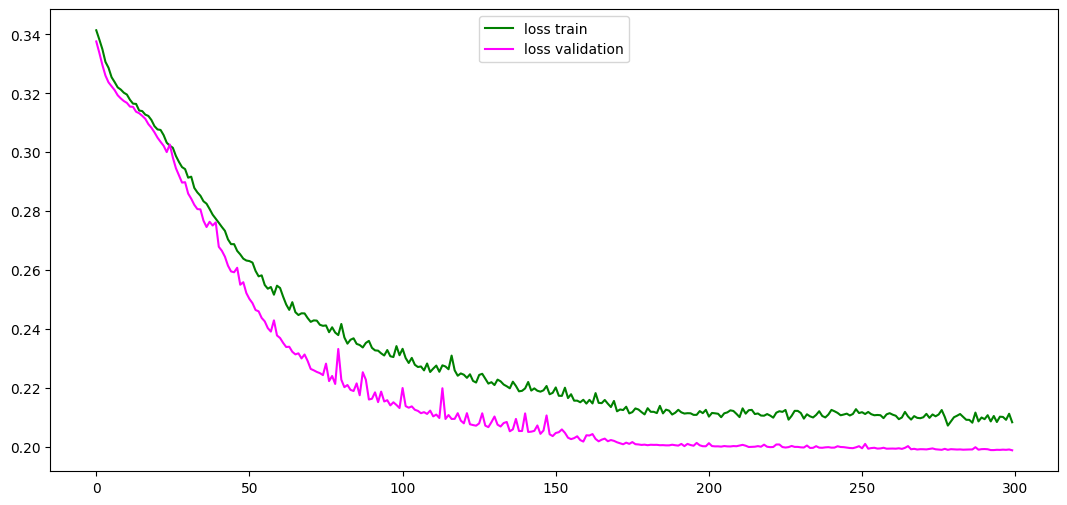

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score , precision_score , recall_score , precision_recall_curve , roc_curve, auc , roc_auc_score
import matplotlib.pyplot as plt

# Rest of your code
plt.rcParams['figure.figsize'] = (13, 6)
plt.plot(history.history['loss'], label='loss train', color='green')
plt.plot(history.history['val_loss'], label='loss validation', color='magenta')
plt.legend(['loss train', 'loss validation'], loc='upper center')

# Rest of your code



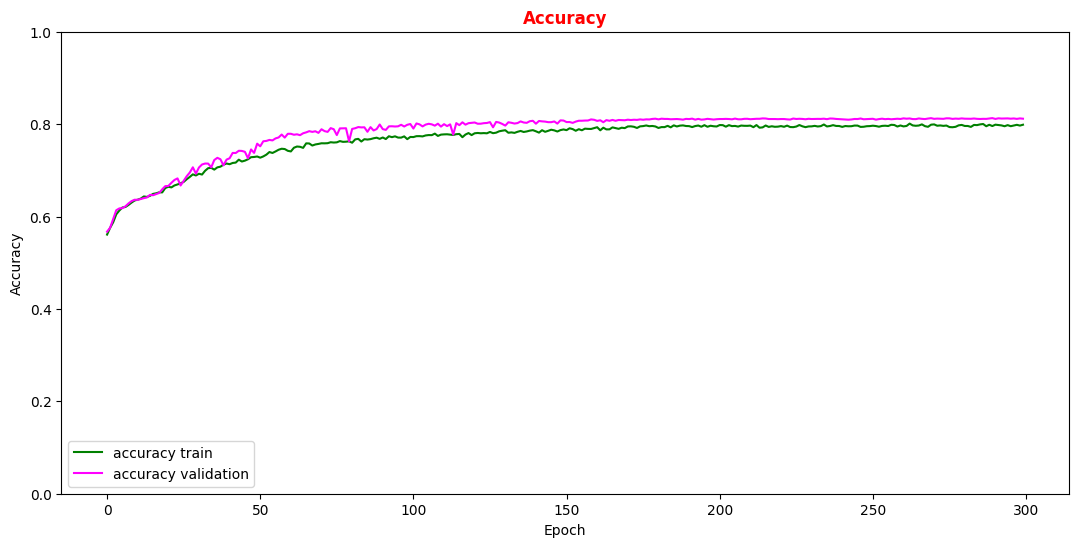

In [103]:
# Plot accuracy metrics vs epoch during the training
# for the proper training dataset and the validation one
plt.rcParams['figure.figsize'] = (13,6)
plt.plot(history.history['accuracy'], label='accuracy train',color='green')
plt.plot(history.history['val_accuracy'], label='accuracy validation',color='magenta')
plt.title("Accuracy",fontsize=12,fontweight='bold', color='r')
plt.ylim([0, 1.0])
plt.legend(loc="lower left")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

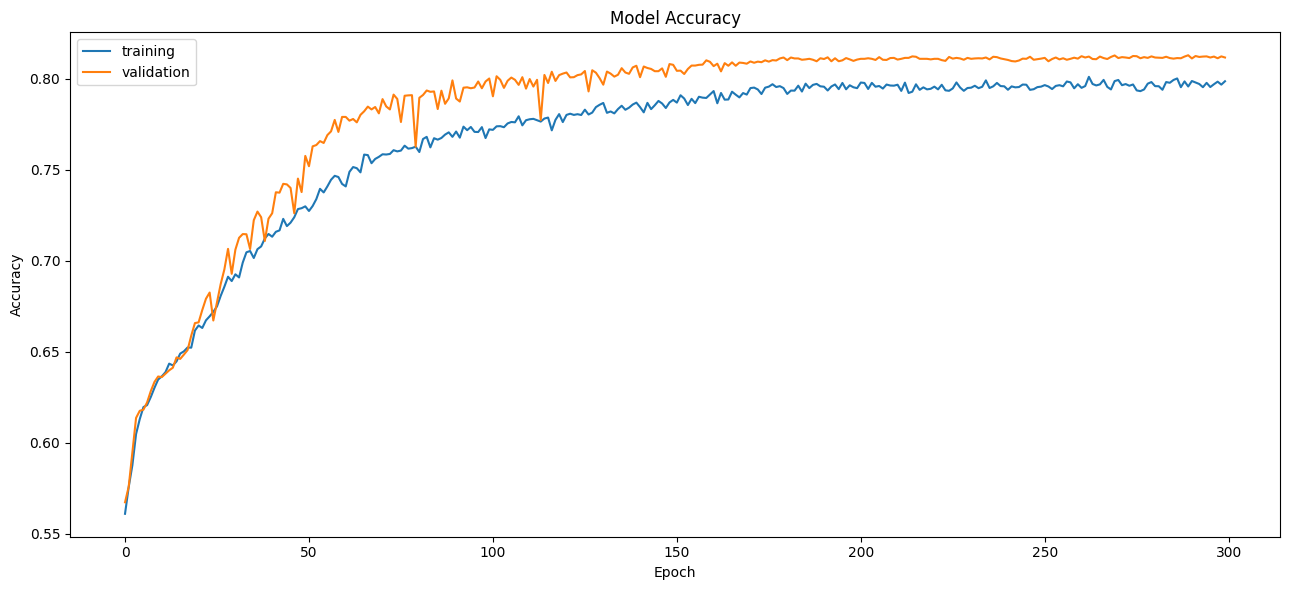

In [104]:
plt.grid(False)
plt.plot(history.history['accuracy'],"-")
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([r'\bf{train}', r'\bf{validation}'],loc='best')
plt.legend(['training', 'validation'], loc='best')
plt.tight_layout()
plt.show()

In [105]:
# Get ANN model label predictions and performance metrics curves, after having trained the model
y_true = Y_test[:,0]
y_true_train = Y_train_val[:,0]
w_test = W_test[:,0]
w_train = W_train_val[:,0]
Y_prediction = model.predict(X_test[:,0:inputs])

253/253 [==============================] - 0s 755us/step


In [106]:
# Get precision, recall, 
p, r, t = precision_recall_curve( y_true= Y_test, probas_pred= Y_prediction , 
                                 sample_weight=w_test )
# Get False Positive Rate (FPR) True Positive Rate (TPR) , Thresholds/Cut on the ANN's score
fpr, tpr, thresholds = roc_curve( y_true= Y_test,  y_score= Y_prediction, sample_weight=w_test )


Y_prediction_train = model.predict(X_train_val[:,0:inputs])
p_train, r_train, t_train = precision_recall_curve( Y_train_val, Y_prediction_train ,
                                                   sample_weight=w_train )
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train_val, Y_prediction_train,
                                                   sample_weight=w_train)

1011/1011 [==============================] - 1s 618us/step


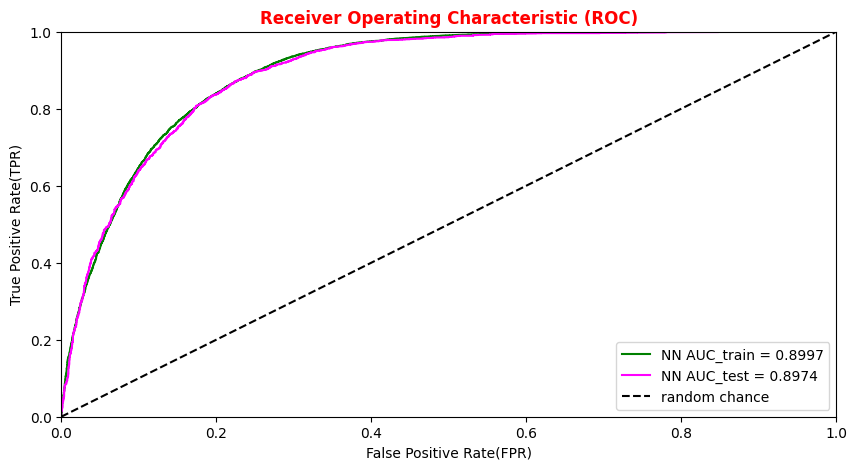

In [107]:
# Plotting the ANN ROC curve on the test and training datasets
roc_auc = auc(fpr, tpr)
roc_auc_train = auc(fpr_train,tpr_train)
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(fpr_train, tpr_train,  color='green', label='NN AUC_train = %.4f' % (roc_auc_train))
plt.plot(fpr, tpr, color='magenta', label='NN AUC_test = %.4f' % (roc_auc))
# Comparison with the random chance curve
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')
plt.xlim([0, 1.0]) #fpr
plt.ylim([0, 1.0]) #tpr
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC)',fontsize=12,fontweight='bold', color='r')
plt.legend(loc="lower right")
plt.show()

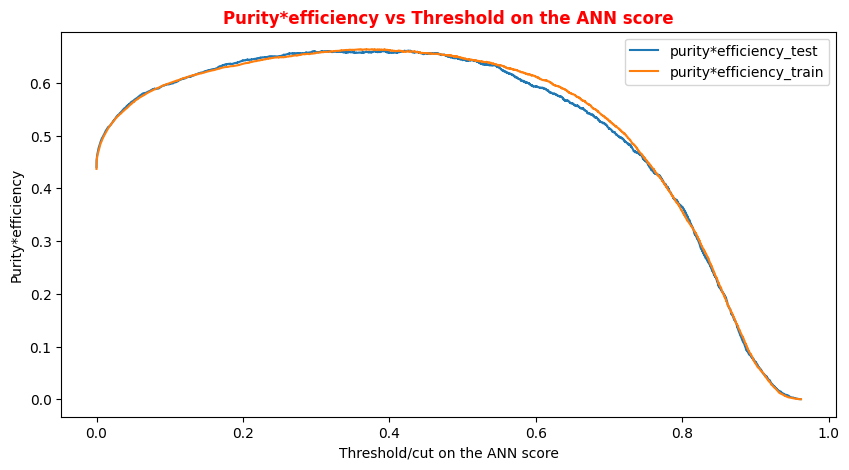

In [108]:
# Plot of the metrics Efficiency x Purity -- ANN 
# Looking at this curve we will choose a threshold on the ANN score
# for distinguishing between signal and background events
#plt.plot(t, p[:-1], label='purity_test')
#plt.plot(t_train, p_train[:-1], label='purity_train')
#plt.plot(t, r[:-1], label='efficiency_test')
#plt.plot(t_train, r_train[:-1], label='efficiency_test')
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(t,p[:-1]*r[:-1],label='purity*efficiency_test')
plt.plot(t_train,p_train[:-1]*r_train[:-1],label='purity*efficiency_train')
plt.xlabel('Threshold/cut on the ANN score')
plt.ylabel('Purity*efficiency')
plt.title('Purity*efficiency vs Threshold on the ANN score',fontsize=12,fontweight='bold', color='r')
#plt.tick_params(width=2, grid_alpha=0.5)
plt.legend(markerscale=50)
plt.show()

In [109]:
cut_dnn=0.6
# Transform predictions into a array of entries 0,1 depending if prediction is beyond the
# chosen threshold
y_pred = Y_prediction[:,0] 
y_pred[y_pred >= cut_dnn]= 1 #classify them as signal
y_pred[y_pred < cut_dnn]= 0 #classify them as background
y_pred_train = Y_prediction_train[:,0]
y_pred_train[y_pred_train>=cut_dnn]=1
y_pred_train[y_pred_train<cut_dnn]=0

print("y_true.shape",y_true.shape)
print("y_pred.shape",y_pred.shape)
print("w_test.shape",w_test.shape)
print("Y_prediction",Y_prediction)
print("y_pred",y_pred)

y_true.shape (8087,)
y_pred.shape (8087,)
w_test.shape (8087,)
Y_prediction [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
y_pred [0. 1. 0. ... 0. 0. 0.]


In [110]:
# Other Metrics values for the ANN algorithm having fixed an ANN score threshold
accuracy  = accuracy_score(y_true, y_pred, sample_weight=w_test)
precision = precision_score(y_true, y_pred, sample_weight=w_test)
recall    = recall_score(y_true, y_pred, sample_weight=w_test)
f1 = 2*precision*recall/(precision+recall)
cm = confusion_matrix( y_true, y_pred, sample_weight=w_test)

print('ANN Test Accuracy: %.4f' % accuracy)
print('ANN Test Precision/Purity: %.4f' % precision)
print('ANN Test Sensitivity/Recall/TPR/Signal Efficiency: %.4f' % recall)
print('ANN Test F1: %.4f' % f1)
print('')



ANN Test Accuracy: 0.8047
ANN Test Precision/Purity: 0.8000
ANN Test Sensitivity/Recall/TPR/Signal Efficiency: 0.7414
ANN Test F1: 0.7696



Cut/Threshold on the ANN output : 0.6000 

Confusion matrix ANN



Text(0.5, 1.0, 'Normalized Confusion Matrix for the Test data set - Artificial Neural Network ')

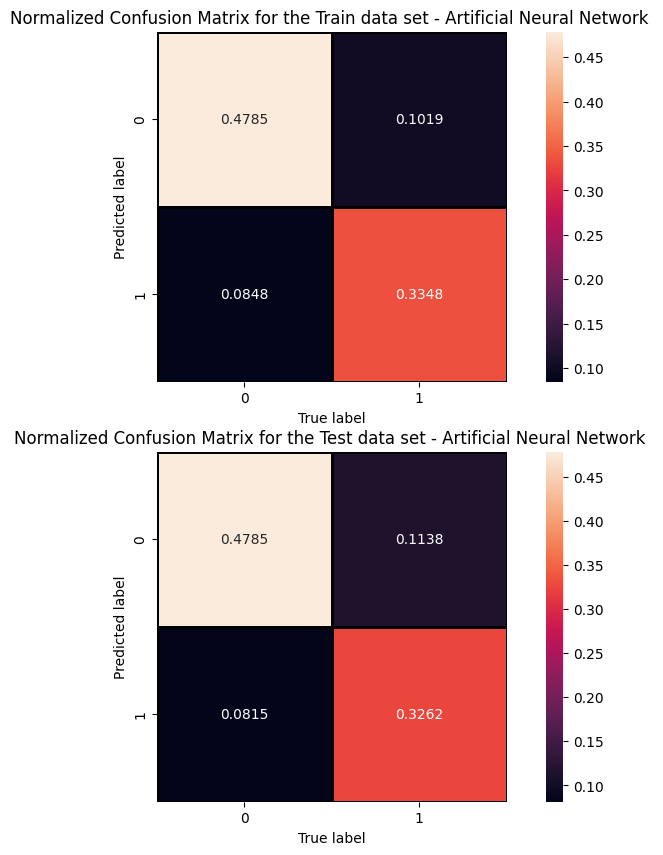

In [111]:
import seaborn as sns
print('Cut/Threshold on the ANN output : %.4f \n' % cut_dnn )
print('Confusion matrix ANN\n')

plt.style.use('default') # It's ugly otherwise
plt.figure(figsize=(10,10) )


plt.subplot(2,1,1)
mat_train = confusion_matrix(y_true_train, y_pred_train,sample_weight=w_train,normalize='all')
sns.heatmap(mat_train.T, square=True, annot=True, fmt='.4f', cbar=True,linewidths=1,linecolor='black' )
plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Normalized Confusion Matrix for the Train data set - Artificial Neural Network ')

plt.subplot(2, 1, 2)
mat_test = confusion_matrix(y_true, y_pred ,sample_weight=w_test,normalize='all' )
sns.heatmap(mat_test.T, square=True, annot=True, fmt='.4f', cbar=True,linewidths=1,linecolor='black')
plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Normalized Confusion Matrix for the Test data set - Artificial Neural Network ')

In [112]:


#plotting signal and background ANN predictions for the training and test datasets. 
#If the distributions are quite similar it means that the algorithm learned how to generalize!

df_sig=df_Sig.filter(nn_variables)
df_bkg  = df_Bacg.filter(nn_variables)

X_sig  = np.asarray( df_sig.values ).astype(np.float32)
X_bkg  = np.asarray( df_bkg.values ).astype(np.float32)

df_test = df_all.iloc[0:test_size+1]
df_train = df_all.iloc[test_size+1:size]

df_test_sig = df_test[(df_test['isSignal']>=1)].filter(nn_variables)
df_test_bkg = df_test[(df_test['isSignal']<1)].filter(nn_variables)

df_train_sig = df_train[(df_train['isSignal']>=1)].filter(nn_variables)
df_train_bkg = df_train[(df_train['isSignal']<1)].filter(nn_variables)

X_test_sig  = np.asarray( df_test_sig.values ).astype(np.float32)
X_test_bkg  = np.asarray( df_test_bkg.values ).astype(np.float32)
X_train_sig  = np.asarray( df_train_sig.values ).astype(np.float32)
X_train_bkg  = np.asarray( df_train_bkg.values ).astype(np.float32)

print('Test dataset shape:')
print(df_test.shape)
print('Test dataset signal shape:')
print(df_test_sig.shape)
print('Test dataset background shape:')
print(df_test_bkg.shape)
print('Training dataset shape' )
print(df_train.shape)
print('Training signal dataset shape' )
print(df_train_sig.shape)
print('Training background dataset shape' )
print(df_train_bkg.shape)

Test dataset shape:
(8087, 19)
Test dataset signal shape:
(3546, 17)
Test dataset background shape:
(4541, 17)
Training dataset shape
(32347, 19)
Training signal dataset shape
(14173, 17)
Training background dataset shape
(18174, 17)


In [113]:

Y_test_sig = model.predict(X_test_sig)
Y_test_bkg = model.predict(X_test_bkg) 
Y_train_sig = model.predict(X_train_sig)
Y_train_bkg = model.predict(X_train_bkg)

568/568 [==============================] - 0s 646us/step


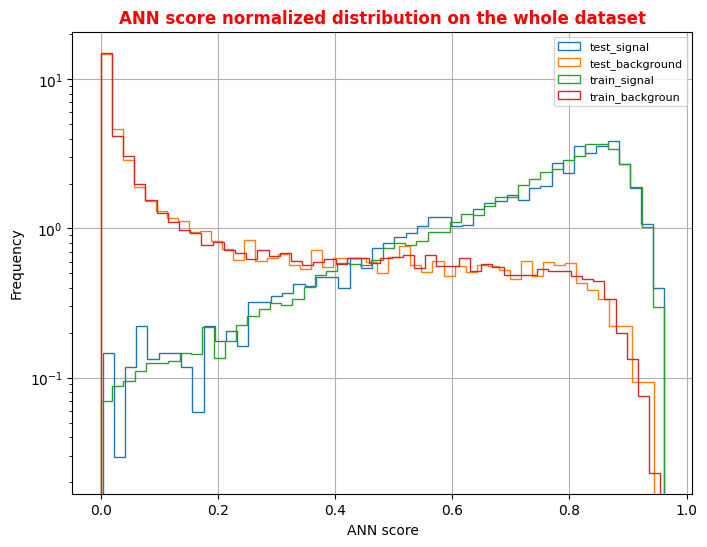

In [114]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)  
bins = 50

fig, ax = plt.subplots()  # Create a figure and axis object

hist_test_sig = ax.hist(Y_test_sig, bins=bins, label='test_signal', histtype='step', log=True, density=1)
hist_test_bkg = ax.hist(Y_test_bkg, bins=bins, label='test_background', histtype='step', log=True, density=1)
hist_train_sig = ax.hist(Y_train_sig, bins=bins, label='train_signal', histtype='step', log=True, density=1)
hist_train_bkg = ax.hist(Y_train_bkg, bins=bins, label='train_backgroun', histtype='step', log=True, density=1)

ax.set_xlabel('ANN score')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right', prop={'size': 8})  # Adjust the legend font size
ax.set_title('ANN score normalized distribution on the whole dataset', fontsize=12, fontweight='bold', color='r')
ax.grid(True)

plt.show()

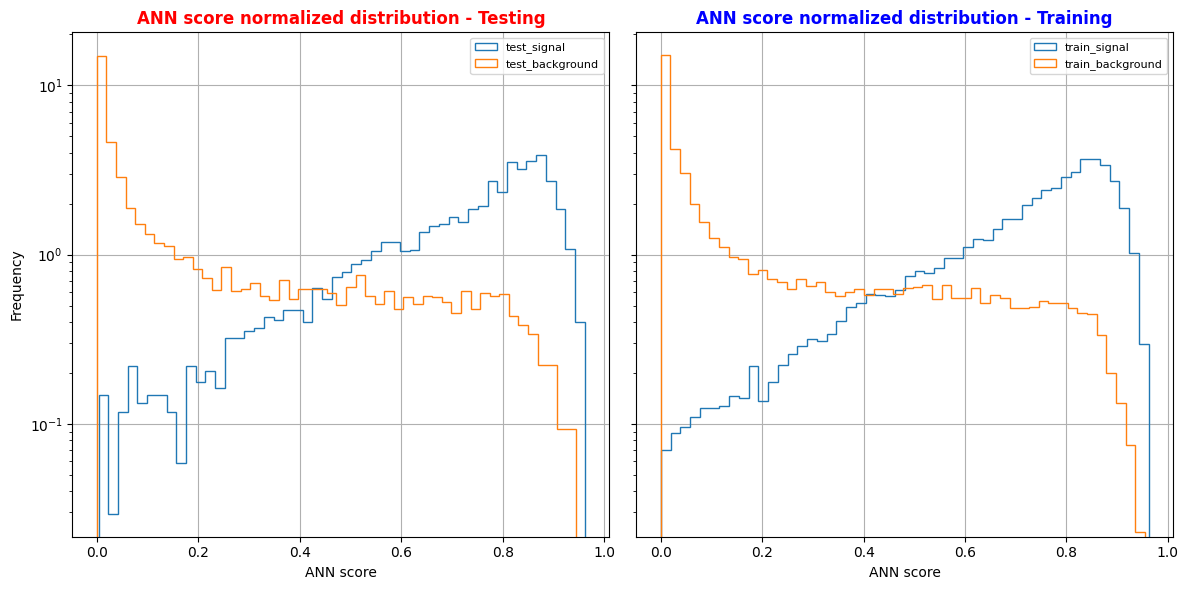

In [115]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 6)  # Adjust the figure size
bins = 50

# Create two subplots, one for training and one for testing
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Plot for testing data
hist_test_sig = ax1.hist(Y_test_sig, bins=bins, label='test_signal', histtype='step', log=True, density=1)
hist_test_bkg = ax1.hist(Y_test_bkg, bins=bins, label='test_background', histtype='step', log=True, density=1)
ax1.set_xlabel('ANN score')
ax1.set_ylabel('Frequency')
ax1.legend(loc='upper right', prop={'size': 8})
ax1.set_title('ANN score normalized distribution - Testing', fontsize=12, fontweight='bold', color='r')
ax1.grid(True)

# Plot for training data
hist_train_sig = ax2.hist(Y_train_sig, bins=bins, label='train_signal', histtype='step', log=True, density=1)
hist_train_bkg = ax2.hist(Y_train_bkg, bins=bins, label='train_background', histtype='step', log=True, density=1)
ax2.set_xlabel('ANN score')
ax2.legend(loc='upper right', prop={'size': 8})
ax2.set_title('ANN score normalized distribution - Training', fontsize=12, fontweight='bold', color='b')
ax2.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# We Can Also plot Random Forest 

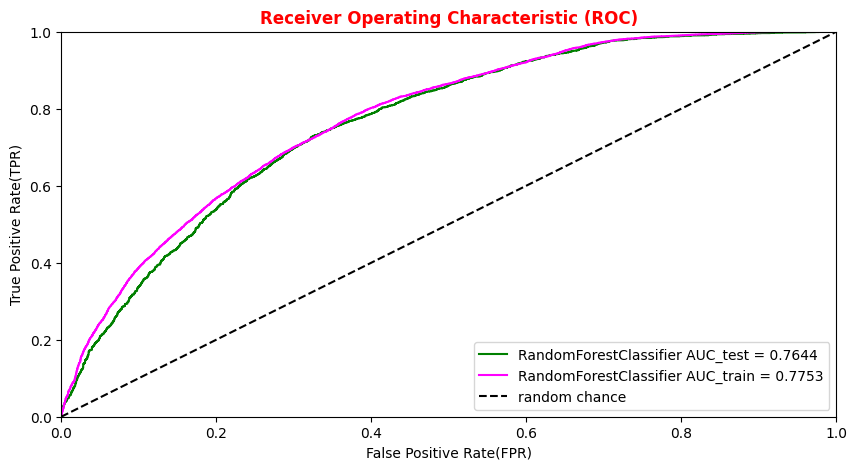

In [116]:
# Get RF model predictions and performance metric curves, after having trained the model
# Get RF model predictions and performance metric curves, after having trained the model
# Do it for the test dataset:
y_pred_rfc=randomforest.predict(X_test[:,0:inputs])
y_pred_rfc_prob= randomforest.predict_proba(X_test[:,0:inputs])
y_pred_rfc_proba = y_pred_rfc_prob[:,-1]
p_rf,r_rf,t_rf= precision_recall_curve(Y_test, probas_pred=y_pred_rfc_proba , sample_weight=w_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_score=y_pred_rfc_proba, sample_weight=w_test  )

# Do the same for the training dataset:
y_pred_rfc_train=randomforest.predict(X_train_val[:,0:inputs])
y_pred_rfc_train_prob= randomforest.predict_proba(X_train_val[:,0:inputs])
y_pred_rfc_train_proba = y_pred_rfc_train_prob[:,-1] #last element associated to the signal probability
p_train_rf, r_train_rf, t_train_rf = precision_recall_curve(Y_train_val, y_pred_rfc_train_proba, sample_weight=w_train)
fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(Y_train_val, y_pred_rfc_train_proba, sample_weight=w_train)
# Plotting the ROC curve for the Random Forest algorithm
roc_auc_rf = auc(fpr_rf,tpr_rf)
roc_auc_rf_train = auc(fpr_train_rf,tpr_train_rf)

plt.rcParams['figure.figsize'] = (10,5)
#Random Forest 1st method
plt.plot(fpr_rf,tpr_rf,  color='green', label='RandomForestClassifier AUC_test = %.4f' % (roc_auc_rf))
plt.plot(fpr_train_rf,tpr_train_rf, color='magenta', label='RandomForestClassifier AUC_train = %.4f' % (roc_auc_rf_train))
#Random Forest 2nd method : use the sklearn function "plot_roc_curve"
#rfc_disp = plot_roc_curve(rfc, X_train_val,Y_train_val,color='brown',ax=ax, sample_weight=w_train )
#rfc_disp = plot_roc_curve(rfc, X_test, Y_test, color='grey',ax=ax, sample_weight=w_test)
#random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')
plt.xlim([0, 1.0]) #fpr
plt.ylim([0, 1.0]) #tpr
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC)',fontsize=12,fontweight='bold', color='r')
plt.legend(loc="lower right")
plt.show()


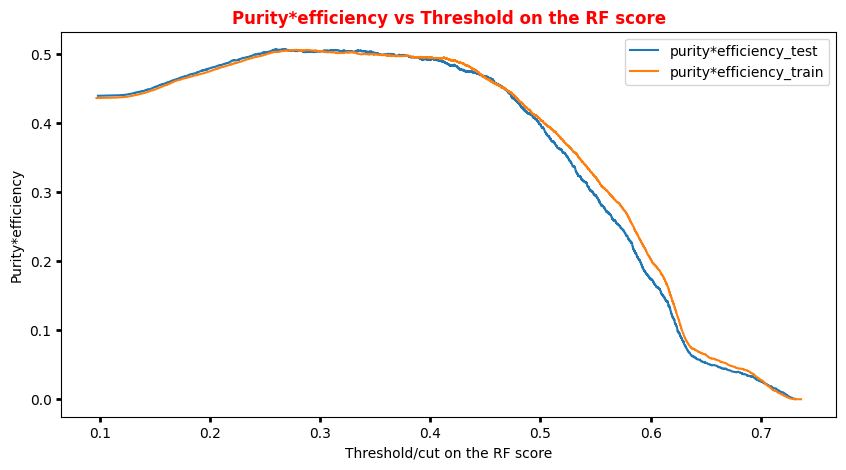

In [117]:

plt.rcParams['figure.figsize'] = (10,5)
plt.plot(t_rf,p_rf[:-1]*r_rf[:-1],label='purity*efficiency_test')
plt.plot(t_train_rf,p_train_rf[:-1]*r_train_rf[:-1],label='purity*efficiency_train')
plt.ylabel('Purity*efficiency')
plt.xlabel('Threshold/cut on the RF score')
plt.title('Purity*efficiency vs Threshold on the RF score',fontsize=12,fontweight='bold', color='r')
plt.tick_params(width=2, grid_alpha=0.5)
plt.legend(markerscale=50)
plt.show()

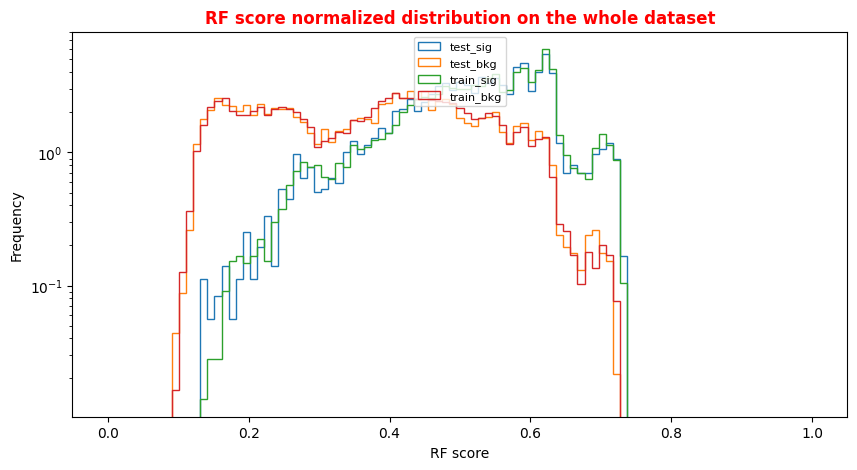

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for signal and background events in the whole dataset
Y_sig_rfc = randomforest.predict_proba(X_sig)[:, 1]  # Probability of belonging to the signal class
Y_bkg_rfc = randomforest.predict_proba(X_bkg)[:, 1]  # Probability of belonging to the background class

# Predict probabilities for signal and background events in the test dataset
Y_test_sig_rf = randomforest.predict_proba(X_test_sig)[:, 1]
Y_test_bkg_rf = randomforest.predict_proba(X_test_bkg)[:, 1]

# Predict probabilities for signal and background events in the training dataset
Y_train_sig_rf = randomforest.predict_proba(X_train_sig)[:, 1]
Y_train_bkg_rf = randomforest.predict_proba(X_train_bkg)[:, 1]

# Random Forest score Plot for the whole dataset
X = np.linspace(0.0, 1.0, 100)  # 100 numbers between 0 and 1
plt.rcParams['figure.figsize'] = (10, 5)

# Plot histograms for test and training datasets
plt.hist(Y_test_sig_rf, bins=X, label='test_sig', histtype='step', log=True, density=1)
plt.hist(Y_test_bkg_rf, bins=X, label='test_bkg', histtype='step', log=True, density=1)
plt.hist(Y_train_sig_rf, bins=X, label='train_sig', histtype='step', log=True, density=1)
plt.hist(Y_train_bkg_rf, bins=X, label='train_bkg', histtype='step', log=True, density=1)

plt.xlabel('RF score')
plt.ylabel('Frequency')
plt.legend(loc='upper center', prop={'size': 8})
plt.title('RF score normalized distribution on the whole dataset', fontsize=12, fontweight='bold', color='r')
plt.show()


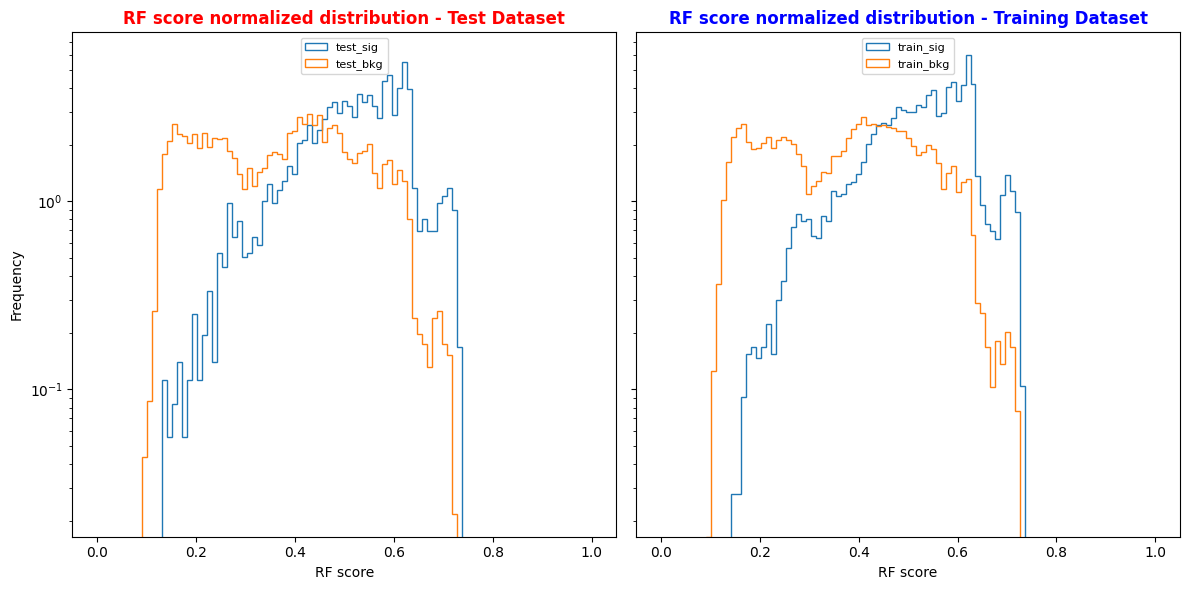

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for signal and background events in the whole dataset
Y_sig_rfc = randomforest.predict_proba(X_sig)[:, 1]  # Probability of belonging to the signal class
Y_bkg_rfc = randomforest.predict_proba(X_bkg)[:, 1]  # Probability of belonging to the background class

# Predict probabilities for signal and background events in the test dataset
Y_test_sig_rf = randomforest.predict_proba(X_test_sig)[:, 1]
Y_test_bkg_rf = randomforest.predict_proba(X_test_bkg)[:, 1]

# Predict probabilities for signal and background events in the training dataset
Y_train_sig_rf = randomforest.predict_proba(X_train_sig)[:, 1]
Y_train_bkg_rf = randomforest.predict_proba(X_train_bkg)[:, 1]

# Random Forest score Plot for the whole dataset
X = np.linspace(0.0, 1.0, 100)  # 100 numbers between 0 and 1
plt.rcParams['figure.figsize'] = (12, 6)  # Adjust the figure size

# Create two subplots, one for testing and one for training
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Plot histograms for test dataset
ax1.hist(Y_test_sig_rf, bins=X, label='test_sig', histtype='step', log=True, density=1)
ax1.hist(Y_test_bkg_rf, bins=X, label='test_bkg', histtype='step', log=True, density=1)
ax1.set_xlabel('RF score')
ax1.set_ylabel('Frequency')
ax1.legend(loc='upper center', prop={'size': 8})
ax1.set_title('RF score normalized distribution - Test Dataset', fontsize=12, fontweight='bold', color='r')

# Plot histograms for training dataset
ax2.hist(Y_train_sig_rf, bins=X, label='train_sig', histtype='step', log=True, density=1)
ax2.hist(Y_train_bkg_rf, bins=X, label='train_bkg', histtype='step', log=True, density=1)
ax2.set_xlabel('RF score')
ax2.legend(loc='upper center', prop={'size': 8})
ax2.set_title('RF score normalized distribution - Training Dataset', fontsize=12, fontweight='bold', color='b')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


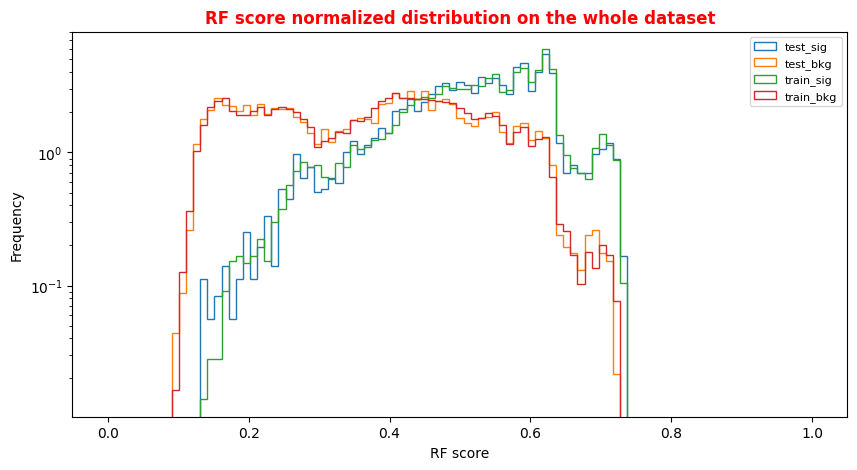

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for signal and background events in the whole dataset
Y_sig_rfc = randomforest.predict_proba(X_sig)[:, 1]  # Probability of belonging to the signal class
Y_bkg_rfc = randomforest.predict_proba(X_bkg)[:, 1]  # Probability of belonging to the background class

# Predict probabilities for signal and background events in the test dataset
Y_test_sig_rf = randomforest.predict_proba(X_test_sig)[:, 1]
Y_test_bkg_rf = randomforest.predict_proba(X_test_bkg)[:, 1]

# Predict probabilities for signal and background events in the training dataset
Y_train_sig_rf = randomforest.predict_proba(X_train_sig)[:, 1]
Y_train_bkg_rf = randomforest.predict_proba(X_train_bkg)[:, 1]

# Random Forest score Plot for the whole dataset
X = np.linspace(0.0, 1.0, 100)  # 100 numbers between 0 and 1
plt.rcParams['figure.figsize'] = (10, 5)

# Plot histograms for test and training datasets
plt.hist(Y_test_sig_rf, bins=X, label='test_sig', histtype='step', log=True, density=1)
plt.hist(Y_test_bkg_rf, bins=X, label='test_bkg', histtype='step', log=True, density=1)
plt.hist(Y_train_sig_rf, bins=X, label='train_sig', histtype='step', log=True, density=1)
plt.hist(Y_train_bkg_rf, bins=X, label='train_bkg', histtype='step', log=True, density=1)

plt.xlabel('RF score')
plt.ylabel('Frequency')
plt.legend(loc='upper right', prop={'size': 8})
plt.title('RF score normalized distribution on the whole dataset', fontsize=12, fontweight='bold', color='r')
plt.show()


In [121]:
cut_rf=0.6

y_pred_rfc[y_pred_rfc >= cut_rf]=1 #classify them as signal
y_pred_rfc[y_pred_rfc < cut_rf]=0 #classify them as background

#print("y_pred_rfc.shape",y_pred_rfc.shape)
#print("y_pred_rfc",y_pred_rfc)

#Metrics for the RandomForest
accuracy_rfc  = accuracy_score(y_true, y_pred_rfc, sample_weight=w_test) #fraction of correctly classified events
precision_rfc = precision_score(y_true, y_pred_rfc, sample_weight=w_test) #Precision of the positive class in binary classification
recall_rfc    = recall_score(y_true, y_pred_rfc, sample_weight=w_test) #Recall of the positive class in binary classification 
f1_rfc = 2*precision_rfc*recall_rfc/(precision_rfc+recall_rfc)
print('Cut/Threshold on the Random Forest output : %.4f' % cut_rf)
print('Random Forest Test Accuracy: %.4f' % accuracy_rfc)
print('Random Forest Test Precision/Purity:  %.4f' % precision_rfc)
print('Random Forest Test Sensitivity/Recall/TPR/Signal Efficiency: %.4f' % recall_rfc)
print('RF Test F1:   %.4f' %f1_rfc)
print('')

Cut/Threshold on the Random Forest output : 0.6000
Random Forest Test Accuracy: 0.6942
Random Forest Test Precision/Purity:  0.6740
Random Forest Test Sensitivity/Recall/TPR/Signal Efficiency: 0.5908
RF Test F1:   0.6296



Cut/Threshold on the Random Forest output : 0.6000


Text(0.5, 1.0, 'Normalized Confusion Matrix for the Test data set - Random Forest ')

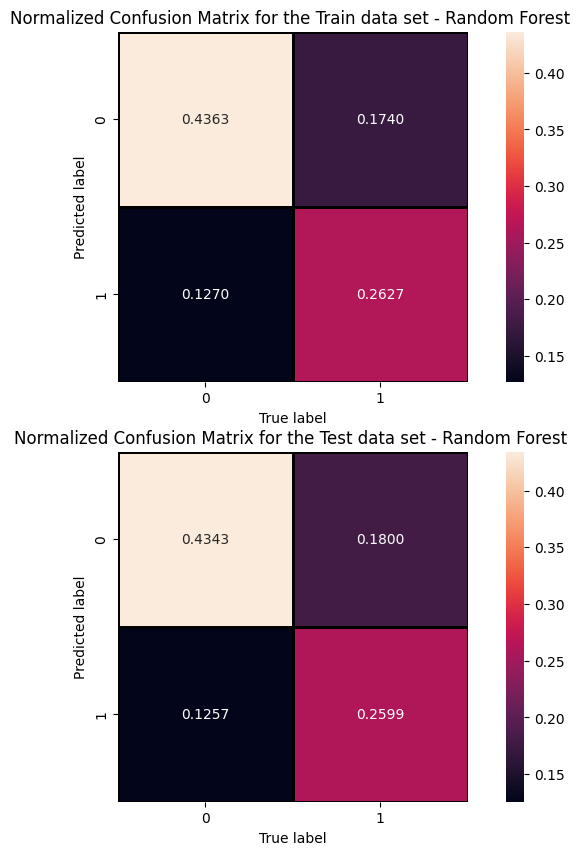

In [122]:
print('Cut/Threshold on the Random Forest output : %.4f' % cut_rf)
plt.style.use('default') # It's ugly otherwise
plt.figure(figsize=(10,10) )


plt.subplot(2,1,1)
mat = confusion_matrix(y_true_train, y_pred_rfc_train,sample_weight=w_train,normalize='all' )
sns.heatmap(mat.T, square=True, annot=True, fmt='.4f', cbar=True,linewidths=1,linecolor='black')
plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Normalized Confusion Matrix for the Train data set - Random Forest ' )

plt.subplot(2, 1, 2)
mat = confusion_matrix(y_true, y_pred_rfc ,sample_weight=w_test, normalize='all' )
sns.heatmap(mat.T, square=True, annot=True, fmt='.4f' ,  cbar=True,linewidths=1,linecolor='black')
plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Normalized Confusion Matrix for the Test data set - Random Forest ')

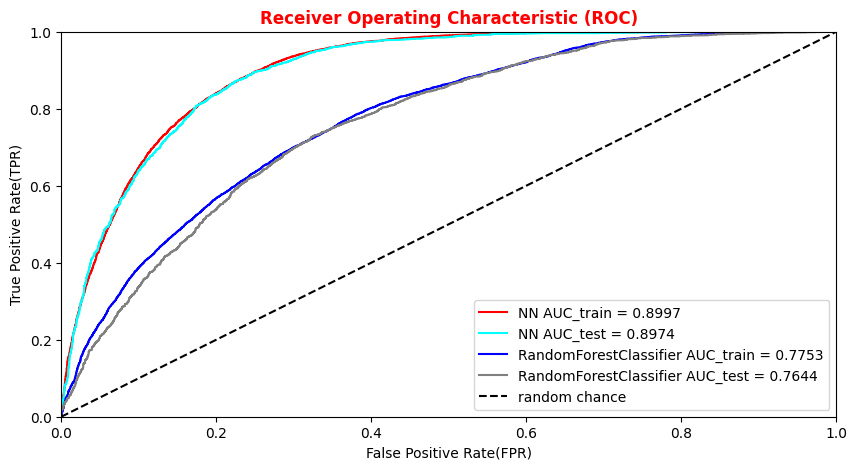

In [123]:
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(fpr_train, tpr_train, color='red', label='NN AUC_train = %.4f' % (roc_auc_train))
plt.plot(fpr, tpr,  color='cyan', label='NN AUC_test = %.4f' % (roc_auc))
#Random Forest 1st method
plt.plot(fpr_train_rf,tpr_train_rf, color='blue', label='RandomForestClassifier AUC_train = %.4f' % (roc_auc_rf_train))
plt.plot(fpr_rf,tpr_rf, color='grey', label='RandomForestClassifier AUC_test = %.4f' % (roc_auc_rf))
#Random Forest 2nd method
#rfc_disp = plot_roc_curve(rfc, X_train_val,Y_train_val,color='brown',ax=ax, sample_weight=w_train )
#rfc_disp = plot_roc_curve(rfc, X_test, Y_test, color='grey',ax=ax, sample_weight=w_test)
#random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')
plt.xlim([0, 1.0]) #fpr
plt.ylim([0, 1.0]) #tpr
plt.title('Receiver Operating Characteristic (ROC)',fontsize=12,fontweight='bold', color='r')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.legend(loc="lower right")
plt.show()


# Plotting Variables and Compare them 

In [124]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Define a data frame for low level features
data = df_all.filter(nn_variables)
X_all   = np.asarray( data.values ).astype(np.float32)
#Use it for evaluating the NN output score for the entire data set
Y_all = model.predict(X_all)


1264/1264 [==============================] - 1s 694us/step


In [125]:
# Add the ANN prediction array 'NNoutput'column to the complete dataframe in order 
# keep the information about the ML algorithm prediction for every event in the whole dataset
df_all['NNoutput'] = Y_all
# Selects events with NNoutput > cut (and RFoutput > cut_rf later on)
cut_dnn = 0.6
df_sel   = df_all[(df_all['NNoutput'] >= cut_dnn)]
df_TP    = df_all[(df_all['NNoutput'] >= cut_dnn) & (df_all['isSignal'] == 1)]
df_unsel = df_all[(df_all['NNoutput'] < cut_dnn)]
df_TN    = df_all[(df_all['NNoutput'] < cut_dnn) & (df_all['isSignal'] == 0)]

TP = len(df_TP)
FP = len(df_sel) - TP
TN = len(df_TN)
FN = len(df_unsel) - TN

truepositiverate = float(TP)/(TP+FN)
fakepositiverate = float(FP)/(FP+FN)
print('ANN score cut chosen:%.4f' % cut_dnn)
print("TP rate = %.4f"%truepositiverate)
print("FP rate = %.4f"%fakepositiverate)

ANN score cut chosen:0.6000
TP rate = 0.7587
FP rate = 0.4416


In [126]:
Y_all_rf = randomforest.predict(X_all)
df_all['RFoutput'] = Y_all_rf

cut_rf = 0.6 
df_sel_rf   = df_all[(df_all['RFoutput'] >= cut_rf)]
df_TP_rf    = df_all[(df_all['RFoutput'] >= cut_rf) & (df_all['isSignal'] == 1)]
df_unsel_rf = df_all[(df_all['RFoutput'] < cut_rf)]
df_TN_rf    = df_all[(df_all['RFoutput'] < cut_rf) & (df_all['isSignal'] == 0)]

TP_rf = len(df_TP_rf)
FP_rf = len(df_sel_rf) - TP_rf
TN_rf = len(df_TN_rf)
FN_rf = len(df_unsel_rf) - TN_rf


truepositiverate_rf = float(TP_rf)/(TP_rf+FN_rf)
fakepositiverate_rf = float(FP_rf)/(FP_rf+FN_rf)
print('RF score cut chosen: %.4f' % cut_rf)
print("TP rate = %.4f"%truepositiverate_rf)

RF score cut chosen: 0.6000
TP rate = 0.5962


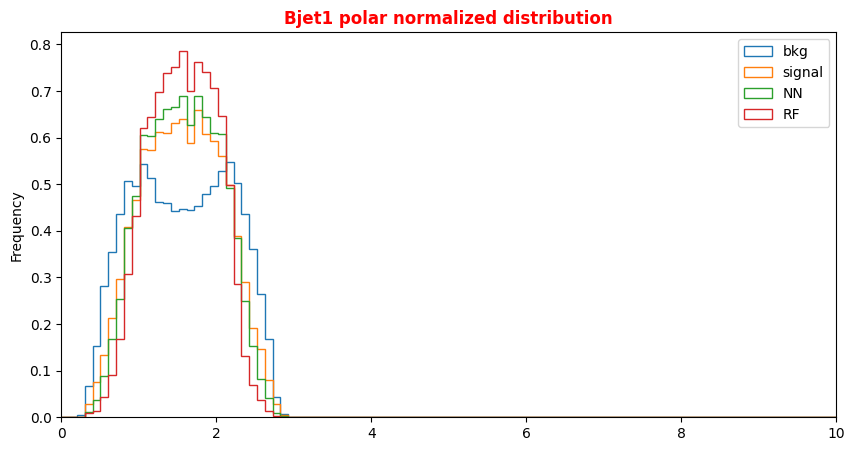

In [127]:
# Plot high level variables for signal, background and NN/RF selected events 
#columns = ['$\mu$1 polar','$\mu$2 polar','$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar', 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy', 'R_mass', 'Bjet_in_m', 'muons_in_m', 'invariant_mass', 'recoil_mass'])
nn_variables = ['$\mu$1 polar', '$\mu$2 polar', '$\mu$1 azi', '$\mu$2 azi', 'Bjet1 polar', 'Bjet2 polar']#, 'Bjet1 azi', 'Bjet2 azi', '$\mu$1 energy', '$\mu$2 energy', 'Bjet1 energy', 'Bjet2 energy','R_mass', 'recoil_mass'] # Approved variables

plt.xlabel('Bjet1 polar')
X = np.linspace(0.0,10.,100)
plt.rcParams['figure.figsize'] = (10,5)
# Plot bkg events
df_all['Bjet1 polar'][(df_all['isSignal'] == 0)].plot.hist( bins=X, label='bkg',histtype='step', density=1 )
# Plot signal events
df_all['Bjet1 polar'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step', density=1)
# Plot selected events by the ANN
df_sel['Bjet1 polar'].plot.hist(bins=X, label='NN',histtype='step', density=1)
# Plot selected events by the RF 
df_sel_rf['Bjet1 polar'].plot.hist(bins=X, label='RF',histtype='step', density=1)
plt.legend(loc='best')
plt.title('Bjet1 polar normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.xlim(0,10)
plt.show()


(0.0, 1000.0)

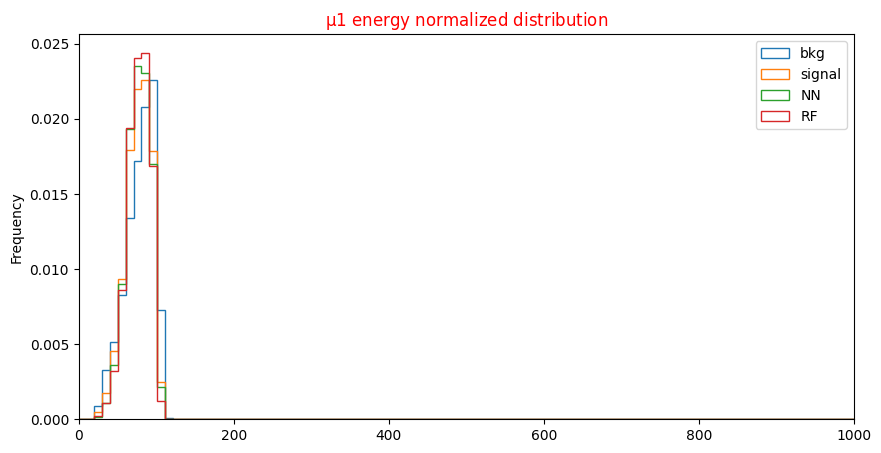

In [128]:
plt.xlabel('$\mu$1 energy')
X = np.linspace(0.0,1000.,100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['$\mu$1 energy'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step', density=1 )
df_all['$\mu$1 energy'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step', density=1)
df_sel['$\mu$1 energy'].plot.hist(bins=X, label='NN',histtype='step', density=1)
df_sel_rf['$\mu$1 energy'].plot.hist(bins=X, label='RF',histtype='step', density=1)
plt.title('$\mu$1 energy normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.legend(loc='upper right')
plt.xlim(0,1000)

(50.0, 400.0)

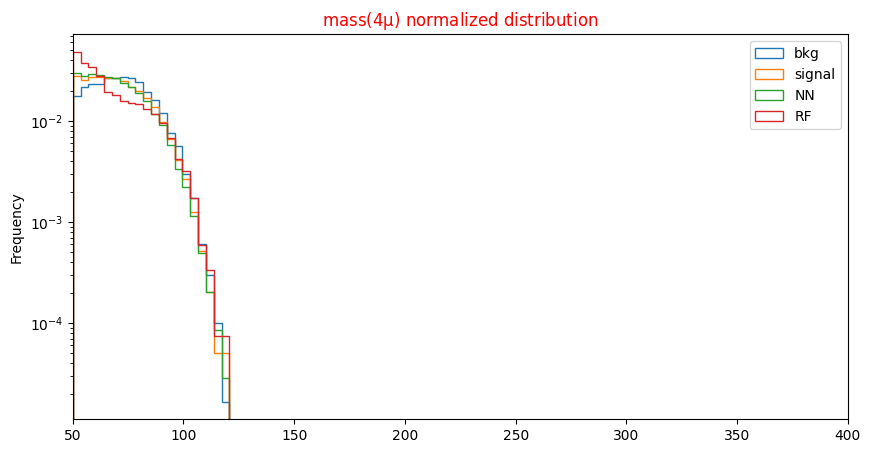

In [129]:
plt.xlabel('')
#invariant_mass ,recoil_mass,muons_in_m ,Bjet_in_m ,Bjet_in_m ,R_mass, Bjet2 energy	,Bjet1 energy ,Bjet1 azi
X = np.linspace(50, 400, 100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['Bjet_in_m'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step',log=True, density=1)
df_all['Bjet_in_m'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step',log=True, density=1)
df_sel['Bjet_in_m'].plot.hist(bins=X, label='NN',histtype='step', log=True, density=1)
df_sel_rf['Bjet_in_m'].plot.hist(bins=X, label='RF',histtype='step',log=True, density=1)
plt.title('$mass(4\mu)$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.legend(loc='upper right')
plt.xlim(50,400)